# Librarys and Dataset

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score,classification_report
plt.figure(figsize=(20,10))
from sklearn.svm import SVC  
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
import warnings
warnings.filterwarnings('ignore')

<Figure size 1440x720 with 0 Axes>

# Loading Data

In [23]:
data = pd.read_csv("risk_factors_cervical_cancer.csv")

# Data Analysis
Let's have a look in some rows of the dataset...

In [24]:
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
2,34,1,?,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,?,?,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,...,?,?,0,0,0,0,0,0,0,0


# TARGET VARIABLES:
The target variables are four tests and are characterized by ‘1’ or ‘0’ in our data set where ‘1’ represents a malignant tumor and ‘0’ indicates benign tumor.


* Separating numerical and classification data:

In [25]:
numerical_df = ['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies', 'Smokes (years)',
                'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs (number)']
categorical_df = ['Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis','STDs:cervical condylomatosis',
                  'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
                  'STDs:pelvic inflammatory disease', 'STDs:genital herpes','STDs:molluscum contagiosum', 'STDs:AIDS', 
                  'STDs:HIV','STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis','Dx:Cancer', 'Dx:CIN', 
                  'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller','Citology', 'Biopsy']

* replacing null ? with nan:

In [26]:
data = data.replace('?', np.nan)

# checking Missing data 

In [27]:
data.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

* The dataset have a large number of NaN values, being that for the variabes STDs: Time since first diagnosis and STDs: Time since last diagnosis the values arrive to be missing in almost all rows.

* The NaN values will be treated in the pre-processing step .

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             832 non-null object
First sexual intercourse              851 non-null object
Num of pregnancies                    802 non-null object
Smokes                                845 non-null object
Smokes (years)                        845 non-null object
Smokes (packs/year)                   845 non-null object
Hormonal Contraceptives               750 non-null object
Hormonal Contraceptives (years)       750 non-null object
IUD                                   741 non-null object
IUD (years)                           741 non-null object
STDs                                  753 non-null object
STDs (number)                         753 non-null object
STDs:condylomatosis                   753 non-null object
STDs:cervical condylomatosis          753 non-null object
STDs:vaginal condylomatosi

In [29]:
data = data.convert_objects(convert_numeric=True)

* Outliers by using the boxplot

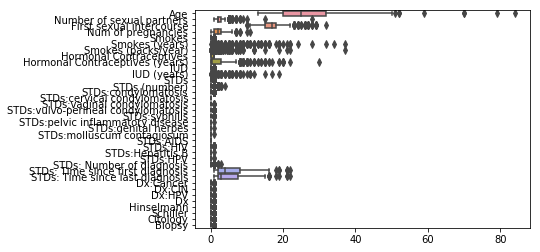

In [32]:
sns.boxplot(data=data, orient= 'h')
plt.figsize=(12,6)

#### * from plotting the boxplot it is understood that the data rightly skewed. 

In [34]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,858.0,26.820513,8.497948,13.0,20.0,25.0,32.0,84.0
Number of sexual partners,832.0,2.527644,1.667760,1.0,2.0,2.0,3.0,28.0
First sexual intercourse,851.0,16.995300,2.803355,10.0,15.0,17.0,18.0,32.0
Num of pregnancies,802.0,2.275561,1.447414,0.0,1.0,2.0,3.0,11.0
Smokes,845.0,0.145562,0.352876,0.0,0.0,0.0,0.0,1.0
Smokes (years),845.0,1.219721,4.089017,0.0,0.0,0.0,0.0,37.0
Smokes (packs/year),845.0,0.453144,2.226610,0.0,0.0,0.0,0.0,37.0
Hormonal Contraceptives,750.0,0.641333,0.479929,0.0,0.0,1.0,1.0,1.0
Hormonal Contraceptives (years),750.0,2.256419,3.764254,0.0,0.0,0.5,3.0,30.0
IUD,741.0,0.112011,0.315593,0.0,0.0,0.0,0.0,1.0


#### *  replacing the objects in numerical coloumns by using median because meidan is least effective f outliers

### MISSING VALUE TREATMENT

* For the categorical column like Smokes, Hormonal Contraceptives, IUD, Biopsy etc., the null values were replaced by the mode. And null values in the numerical column like Age, Number of sexual partners etc. present were replaced by their median values.


In [36]:
for feature in numerical_df:
    print(feature,'',data[feature].convert_objects(convert_numeric=True).median())
    feature_median = round(data[feature].convert_objects(convert_numeric=True).median(),1)
    data[feature] = data[feature].fillna(feature_median)

Age  25.0
Number of sexual partners  2.0
First sexual intercourse  17.0
Num of pregnancies  2.0
Smokes (years)  0.0
Smokes (packs/year)  0.0
Hormonal Contraceptives (years)  0.5
IUD (years)  0.0
STDs (number)  0.0


In [38]:
for feature in categorical_df:
    data[feature] = data[feature].convert_objects(convert_numeric=True).fillna(data[feature].mode()[0])

In [39]:
data['STDs: Time since first diagnosis'] = data['STDs: Time since first diagnosis'].convert_objects(convert_numeric=True).fillna(0)
data['STDs: Time since last diagnosis'] = data['STDs: Time since last diagnosis'].convert_objects(convert_numeric=True).fillna(0)

### Check All columns have been filled/Summary statistics.

In [41]:
data.isna().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [42]:
data_org = data.copy(deep = True)

In [3]:
data_org.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,34,1,17,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37.0,37.0,1,3.0,0,...,0,0,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0.0,0.0,1,15.0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data_org.Biopsy.value_counts()

0    803
1     55
Name: Biopsy, dtype: int64

* As can be seen, the database has an imbalance between the quantity of each class.

* Techniques will be applied to try to deal with imbalance in the pre-processing step.

In [5]:
data_clean = data_org.drop(['Hinselmann','Biopsy','Schiller','Citology'],axis=1)
y = data_org.Biopsy

## Data normalization

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1), copy=True)
scaler.fit(data_clean)
print(scaler.data_max_)
df_scale = pd.DataFrame(scaler.transform(data_clean),columns=data_clean.columns)
df_scale.head()

[84. 28. 32. 11.  1. 37. 37.  1. 30.  1. 19.  1.  4.  1.  0.  1.  1.  1.
  1.  1.  1.  0.  1.  1.  1.  3. 22. 22.  1.  1.  1.  1.]


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
0,0.070423,0.111111,0.227273,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.028169,0.000000,0.181818,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.295775,0.000000,0.318182,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.549296,0.148148,0.272727,0.363636,1.0,1.0,1.0,1.0,0.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.464789,0.074074,0.500000,0.363636,0.0,0.0,0.0,1.0,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
data_derive = data_clean.copy()

In [8]:
data_derive['YRSS'] = data_clean['Age'] - data_clean['First sexual intercourse']
data_derive['NSPP'] = data_clean['Number of sexual partners'] / data_derive['YRSS']
data_derive['HPA'] = data_clean['Hormonal Contraceptives (years)'] / data_clean['Age']
data_derive['TPS'] = data_clean['Smokes (packs/year)'] * data_clean['Smokes (years)']
data_derive['NPA'] = data_clean['Num of pregnancies'] / data_clean['Age']
data_derive['NSA'] = data_clean['Number of sexual partners'] / data_clean['Age']
data_derive['NYHC'] = data_clean['Age'] - data_clean['Hormonal Contraceptives (years)']
data_derive['APP'] = data_clean['Num of pregnancies'] / data_clean['Number of sexual partners']
data_derive['NHCP'] = data_clean['Hormonal Contraceptives (years)'] / data_derive['YRSS']

In [9]:
data_derive['NHCP'] = data_derive['NHCP'].fillna(data_derive['NHCP'].mean())

In [10]:
data_derive = data_derive.replace([np.inf, -np.inf], np.nan)

In [11]:
data_derive['NSPP'] = data_derive['NSPP'].fillna(data_derive['NSPP'].mean())
data_derive['NHCP'] = data_derive['NHCP'].fillna(data_derive['NHCP'].mean())

# K-Means Clustering
K-means clustering is a type of unsupervised learning, which is used when you have unlabelled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:
1.	The centroids of the K clusters, which can be used to label new data.
2.	Labels for the training data (each data point is assigned to a single cluster)
Rather than defining groups before looking at the data, clustering allows you to find and analyze the groups that have formed organically. Each centroid of a cluster is a collection of feature values which define the resulting groups. Examining the centroid feature weights can be used to qualitatively interpret what kind of group each cluster represents.

While modelling, the mean distance to the centroid as a function of K is plotted and the "elbow point," where the rate of decrease sharply shifts, can be used to roughly determine K.


In [12]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_scale)
    Sum_of_squared_distances.append(km.inertia_)

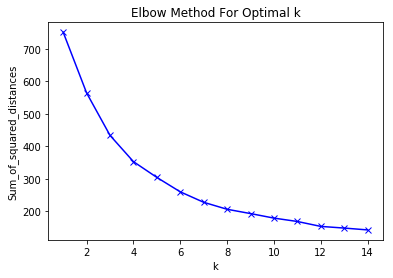

In [13]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

From the elbow plot, the most optimal K for our data here will be 4. We can already see a disparity here. Ideally, only two clusters should have formed: people with cancer and people without

In [14]:
kmeans = KMeans(n_clusters=4, n_init = 15, random_state=7)

In [15]:
kmeans.fit(df_scale)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=15, n_jobs=None, precompute_distances='auto',
    random_state=7, tol=0.0001, verbose=0)

In [16]:
centroids = kmeans.cluster_centers_

In [17]:
centroid_df = pd.DataFrame(centroids, columns = list(df_scale))
centroid_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
0,0.195983,0.050820,0.324797,0.213570,-1.387779e-15,-6.938894e-18,-8.326673e-17,1.000000,9.514776e-02,0.097713,...,0.006237,-6.505213e-18,2.079002e-03,0.009009,0.007560,0.007560,2.286902e-02,1.247401e-02,2.286902e-02,3.326403e-02
1,0.184123,0.045623,0.322934,0.176860,0.000000e+00,-6.938894e-18,3.642919e-17,0.000000,-1.665335e-16,0.095455,...,0.027273,4.553649e-18,9.107298e-18,0.013636,0.014050,0.014050,2.272727e-02,1.363636e-02,1.818182e-02,3.636364e-02
2,0.212265,0.094395,0.271923,0.231698,1.000000e+00,2.258784e-01,8.612615e-02,0.707965,8.092690e-02,0.053097,...,0.044248,8.849558e-03,8.849558e-03,0.026549,0.027755,0.027755,1.769912e-02,1.734723e-18,2.654867e-02,3.122502e-17
3,0.187580,0.065657,0.336777,0.188017,2.272727e-01,5.298954e-02,1.401302e-02,0.636364,7.499242e-02,0.204545,...,0.090909,-6.505213e-19,-1.301043e-18,0.333333,0.226240,0.202479,1.734723e-17,8.673617e-18,1.734723e-17,-1.040834e-17


In [18]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
df_labels['labels'] = df_labels['labels'].astype('category')

In [19]:
# Joining the label dataframe with the Wine data frame to create wine_df_labeled. Note: it could be appended to original dataframe
df_labeled = data_clean.join(df_labels)

In [20]:
df_labeled['labels'].value_counts()

0    481
1    220
2    113
3     44
Name: labels, dtype: int64

In [21]:
df_labeled.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,labels
0,18,4,15,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
1,15,1,14,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
2,34,1,17,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
3,52,5,16,4,1,37.0,37.0,1,3.0,0,...,0,0,0,0,0,1,0,1,0,2
4,46,3,21,4,0,0.0,0.0,1,15.0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 0.92, '3D plot of KMeans Clustering')

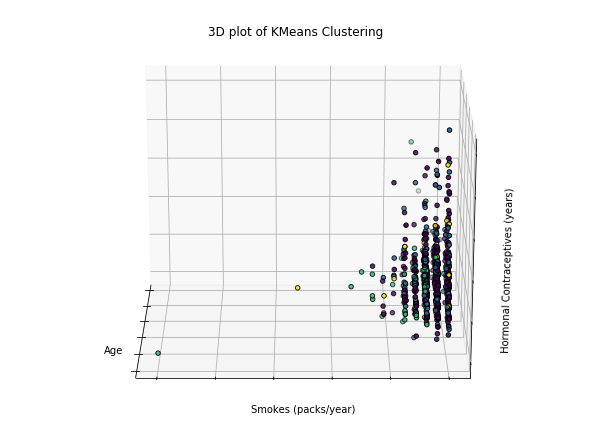

In [22]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=20, azim=180)
kmeans.fit(df_scale)
labels = kmeans.labels_
ax.scatter(df_scale.iloc[:, 0], df_scale.iloc[:, 1], df_scale.iloc[:, 2],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Age')
ax.set_ylabel('Smokes (packs/year)')
ax.set_zlabel('Hormonal Contraceptives (years)')
ax.set_title('3D plot of KMeans Clustering')

### Handling Imbalanced Data

Dealing with imbalanced datasets entails strategies such as improving classification algorithms or balancing classes in the training data (data preprocessing) before providing the data as input to the machine learning algorithm. The later technique is preferred as it has wider application.
The main objective of balancing classes is to either increasing the frequency of the minority class or decreasing the frequency of the majority class. This is done in order to obtain approximately the same number of instances for both the classes.

# Original Data

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(df_scale, y, test_size=0.3, random_state=11)

### Logistic Regression

In [24]:
clf = LogisticRegression()
clf.fit(xtrain,ytrain)
THRESHOLD = 0.50
pred_lr = np.where((clf.predict_proba(xtest)[:,1] >= THRESHOLD), 1, 0)

pd.DataFrame(data=[accuracy_score(ytest, pred_lr)*100, recall_score(ytest, pred_lr)*100,
                   precision_score(ytest, pred_lr)*100, roc_auc_score(ytest, pred_lr)*100], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,95.348837
recall,0.000000
precision,0.000000
roc_auc_score,50.000000


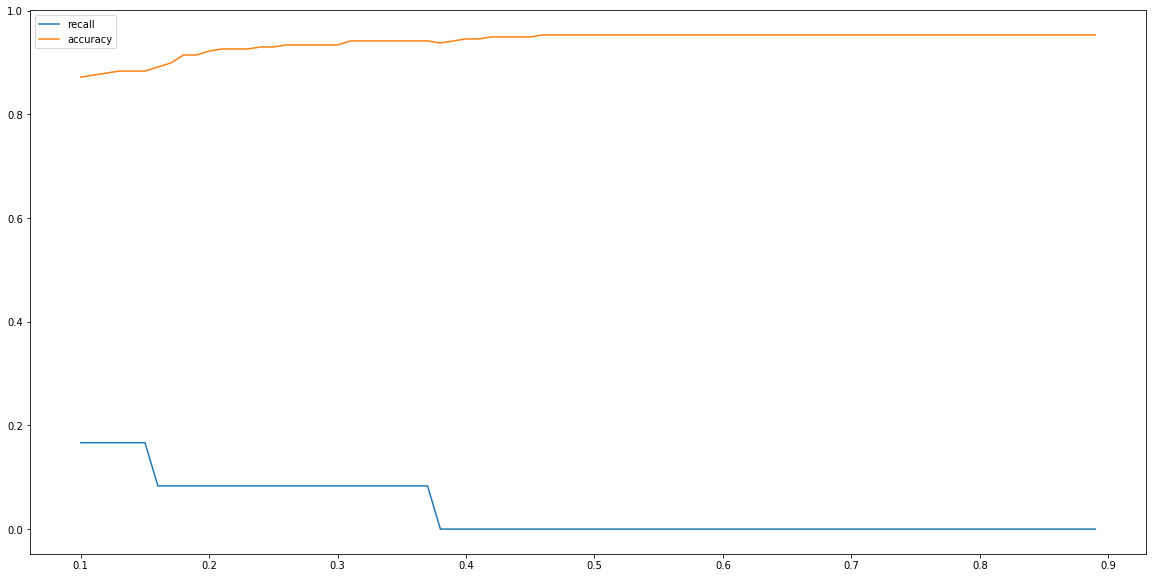

In [25]:
pred_prob=clf.predict_proba(xtest)[:,1]
ind=[]
recall=[]
accuracy=[]
li=np.arange(.1,.9,0.01)
for i in li:
    pred=np.where(pred_prob<i,0,1)
    recall.append(metrics.recall_score(ytest,pred))
    accuracy.append(metrics.accuracy_score(ytest,pred))
    ind.append(i)
plt.figure(figsize=(20,10))
plt.plot(li,recall,label='recall')
plt.plot(li,accuracy,label='accuracy')
plt.legend(loc='best')

In [26]:
clf = LogisticRegression()
clf.fit(xtrain,ytrain)
THRESHOLD = 0.15
pred_lr = np.where((clf.predict_proba(xtest)[:,1] >= THRESHOLD), 1, 0)

pd.DataFrame(data=[accuracy_score(ytest, pred_lr)*100, recall_score(ytest, pred_lr)*100,
                   precision_score(ytest, pred_lr)*100, roc_auc_score(ytest, pred_lr)*100], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,88.372093
recall,16.666667
precision,9.090909
roc_auc_score,54.268293


In [27]:
print(classification_report(ytest, pred_lr))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       246
           1       0.09      0.17      0.12        12

   micro avg       0.88      0.88      0.88       258
   macro avg       0.52      0.54      0.53       258
weighted avg       0.92      0.88      0.90       258



In [28]:
confusion_matrix(ytest, pred_lr)

array([[226,  20],
       [ 10,   2]], dtype=int64)

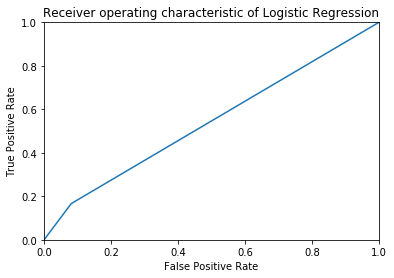

The AUC value for Logistic Regression is: 0.5426829268292683


In [29]:
fpr, tpr, thresholds = roc_curve(ytest, pred_lr)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Logistic Regression')
plt.show()
roc_auc = auc(fpr, tpr)
print('The AUC value for Logistic Regression is:',roc_auc)

# SYNTHETIC MINORITY OVER-SAMPLING TECHNIQUE (SMOTE)
This technique is followed to avoid overfitting which occurs when exact replicas of minority instances are added to the main dataset. A subset of data is taken from the minority class as an example and then new synthetic similar instances are created. These synthetic instances are then added to the original dataset. The new dataset is used as a sample to train the classification models.


### Logistic Regression(SMOTE)

In [30]:
xtrain_s, xtest_s, ytrain_s, ytest_s = train_test_split(df_scale, y, test_size=0.3, random_state=5)

In [31]:
from imblearn.over_sampling import SMOTE
ros = SMOTE(random_state=0,k_neighbors=3,kind='svm',ratio=1,svm_estimator=SVC(kernel='linear'))
xtrain_s, ytrain_s = ros.fit_resample(xtrain_s, ytrain_s)

In [32]:
xtrain_s = pd.DataFrame(xtrain_s, columns=df_scale.columns)
ytrain_s = pd.DataFrame(ytrain_s, columns=['Biopsy'])
ytrain_s.Biopsy.value_counts()

0    558
1    350
Name: Biopsy, dtype: int64

In [33]:
clf = LogisticRegression()
clf.fit(xtrain_s,ytrain_s)
THRESHOLD = 0.50
pred_lr = np.where((clf.predict_proba(xtest_s)[:,1] >= THRESHOLD), 1, 0)

pd.DataFrame(data=[accuracy_score(ytest_s, pred_lr)*100, recall_score(ytest_s, pred_lr)*100,
                   precision_score(ytest_s, pred_lr)*100, roc_auc_score(ytest_s, pred_lr)*100], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,87.596899
recall,46.153846
precision,19.354839
roc_auc_score,67.974882


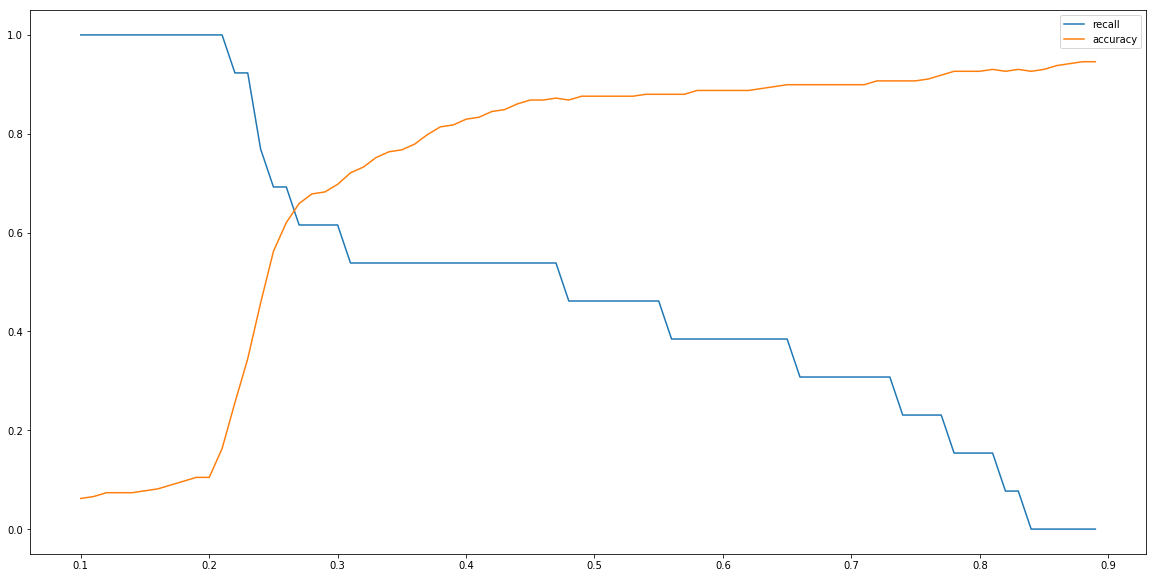

In [34]:
pred_prob=clf.predict_proba(xtest_s)[:,1]
ind=[]
recall=[]
accuracy=[]
li=np.arange(.1,.9,0.01)
for i in li:
    pred=np.where(pred_prob<i,0,1)
    recall.append(metrics.recall_score(ytest_s,pred))
    accuracy.append(metrics.accuracy_score(ytest_s,pred))
    ind.append(i)
plt.figure(figsize=(20,10))
plt.plot(li,recall,label='recall')
plt.plot(li,accuracy,label='accuracy')
plt.legend(loc='best')

In [35]:
clf = LogisticRegression()
clf.fit(xtrain_s,ytrain_s)
THRESHOLD = 0.29
pred_lr = np.where((clf.predict_proba(xtest_s)[:,1] >= THRESHOLD), 1, 0)

pd.DataFrame(data=[accuracy_score(ytest_s, pred_lr)*100, recall_score(ytest_s, pred_lr)*100,
                   precision_score(ytest_s, pred_lr)*100, roc_auc_score(ytest_s, pred_lr)*100], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,68.217054
recall,61.538462
precision,9.411765
roc_auc_score,65.054945


In [36]:
print(classification_report(ytest_s, pred_lr))

              precision    recall  f1-score   support

           0       0.97      0.69      0.80       245
           1       0.09      0.62      0.16        13

   micro avg       0.68      0.68      0.68       258
   macro avg       0.53      0.65      0.48       258
weighted avg       0.93      0.68      0.77       258



In [37]:
confusion_matrix(ytest_s, pred_lr)

array([[168,  77],
       [  5,   8]], dtype=int64)

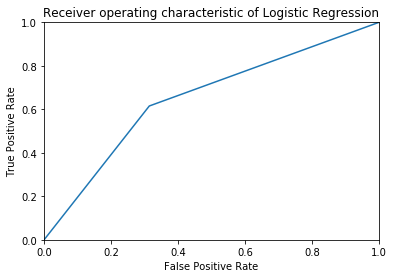

The AUC value for Logistic Regression(SMOTE) is: 0.6505494505494506


In [38]:
fpr, tpr, thresholds = roc_curve(ytest_s, pred_lr)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Logistic Regression')
plt.show()
roc_auc = auc(fpr, tpr)
print('The AUC value for Logistic Regression(SMOTE) is:',roc_auc)

### OVER-SAMPLING
 * Over-Sampling increases the number of instances in the minority class by randomly replicating them in order to present a higher representation of the minority class in the sample.


### Logistic Regression(OverSampling)

* Standard statistical techniques are insensitive to the original density of the data. So, a logistic regression run on oversampled data should produce essentially the same model as on the original data.

In [39]:
xtrain_o, xtest_o, ytrain_o, ytest_o = train_test_split(df_scale, y, test_size=0.3, random_state=11)

In [40]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0,ratio=0.625)
xtrain_o, ytrain_o = ros.fit_resample(xtrain_o, ytrain_o)

In [41]:
xtrain_o = pd.DataFrame(xtrain_o, columns=df_scale.columns)
ytrain_o = pd.DataFrame(ytrain_o, columns=['Biopsy'])
ytrain_o.Biopsy.value_counts()

0    557
1    348
Name: Biopsy, dtype: int64

In [42]:
clf = LogisticRegression()
clf.fit(xtrain_o,ytrain_o)
THRESHOLD = 0.50
pred_lr = np.where((clf.predict_proba(xtest_o)[:,1] >= THRESHOLD), 1, 0)

pd.DataFrame(data=[accuracy_score(ytest_o, pred_lr)*100, recall_score(ytest_o, pred_lr)*100,
                   precision_score(ytest_o, pred_lr)*100, roc_auc_score(ytest_o, pred_lr)*100], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,89.534884
recall,25.000000
precision,14.285714
roc_auc_score,58.841463


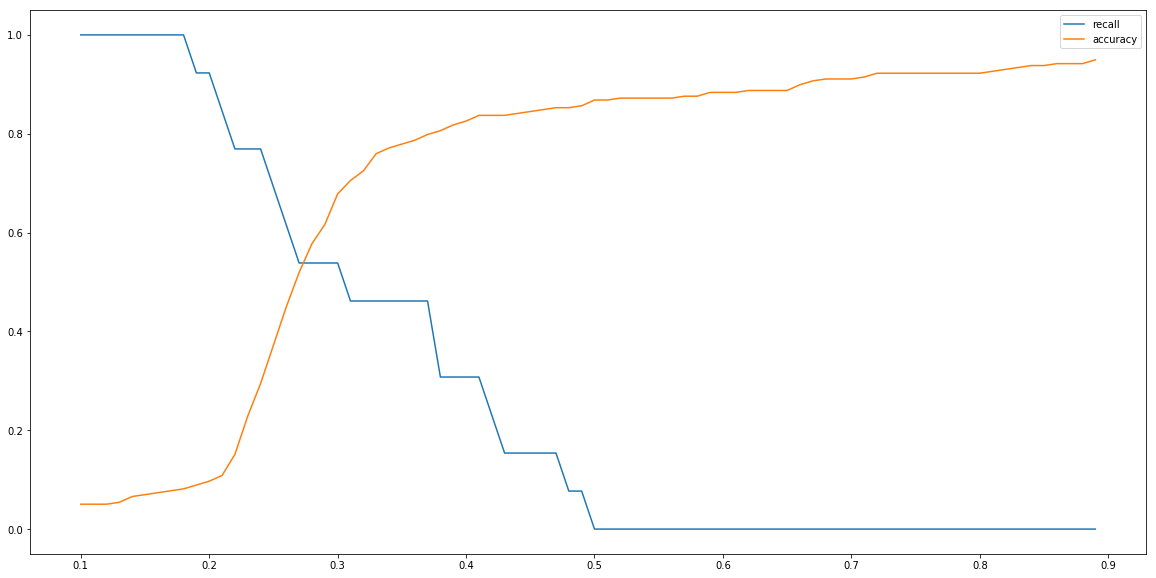

In [43]:
pred_prob=clf.predict_proba(xtest_o)[:,1]
ind=[]
recall=[]
accuracy=[]
li=np.arange(.1,.9,0.01)
for i in li:
    pred=np.where(pred_prob<i,0,1)
    recall.append(metrics.recall_score(ytest_s,pred))
    accuracy.append(metrics.accuracy_score(ytest_s,pred))
    ind.append(i)
plt.figure(figsize=(20,10))
plt.plot(li,recall,label='recall')
plt.plot(li,accuracy,label='accuracy')
plt.legend(loc='best')

In [44]:
clf = LogisticRegression()
clf.fit(xtrain_o,ytrain_o)
THRESHOLD = 0.27
pred_lr = np.where((clf.predict_proba(xtest_o)[:,1] >= THRESHOLD), 1, 0)

pd.DataFrame(data=[accuracy_score(ytest_o, pred_lr)*100, recall_score(ytest_o, pred_lr)*100,
                   precision_score(ytest_o, pred_lr)*100, roc_auc_score(ytest_o, pred_lr)*100], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,52.325581
recall,58.333333
precision,5.600000
roc_auc_score,55.182927


In [45]:
print(classification_report(ytest_o, pred_lr))

              precision    recall  f1-score   support

           0       0.96      0.52      0.68       246
           1       0.06      0.58      0.10        12

   micro avg       0.52      0.52      0.52       258
   macro avg       0.51      0.55      0.39       258
weighted avg       0.92      0.52      0.65       258



In [46]:
confusion_matrix(ytest_o, pred_lr)

array([[128, 118],
       [  5,   7]], dtype=int64)

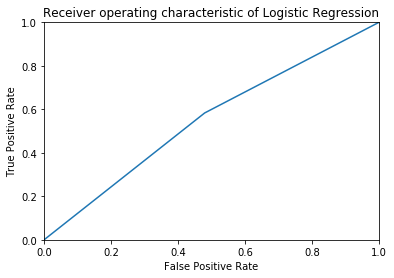

The AUC value for Logistic Regression(OverSampling) is: 0.551829268292683


In [47]:
fpr, tpr, thresholds = roc_curve(ytest_o, pred_lr)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Logistic Regression')
plt.show()
roc_auc = auc(fpr, tpr)
print('The AUC value for Logistic Regression(OverSampling) is:',roc_auc)

## UNDER-SAMPLING
 * Undersampling aims to balance class distribution by randomly eliminating majority class examples.  This is done until the majority and minority class instances are balanced out.


### Logistic Regression(UnderSampling)

In [48]:
xtrain_u, xtest_u, ytrain_u, ytest_u = train_test_split(df_scale, y, test_size=0.3, random_state=11)

In [49]:
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=0,ratio=0.625)
xtrain_u, ytrain_u = ros.fit_resample(xtrain_u, ytrain_u)

In [50]:
xtrain_u = pd.DataFrame(xtrain_u, columns=df_scale.columns)
ytrain_u = pd.DataFrame(ytrain_u, columns=['Biopsy'])
ytrain_u.Biopsy.value_counts()

0    68
1    43
Name: Biopsy, dtype: int64

In [51]:
clf = LogisticRegression()
clf.fit(xtrain_u,ytrain_u)
THRESHOLD = 0.50
pred_lr = np.where((clf.predict_proba(xtest_u)[:,1] >= THRESHOLD), 1, 0)

pd.DataFrame(data=[accuracy_score(ytest_u, pred_lr)*100, recall_score(ytest_u, pred_lr)*100,
                   precision_score(ytest_u, pred_lr)*100, roc_auc_score(ytest_u, pred_lr)*100], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,88.372093
recall,16.666667
precision,9.090909
roc_auc_score,54.268293


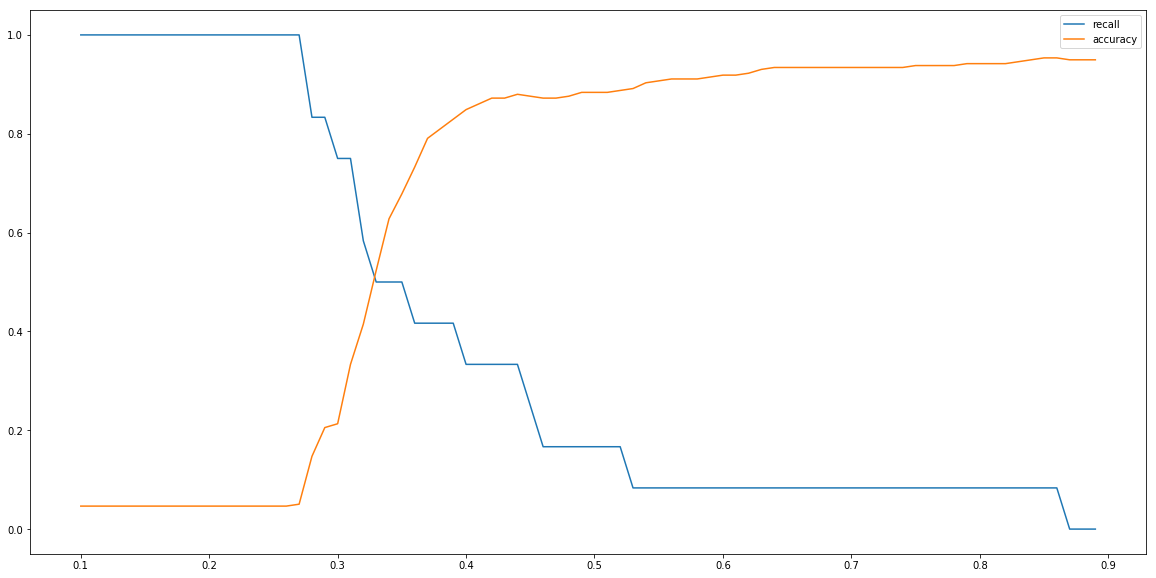

In [52]:
pred_prob=clf.predict_proba(xtest_u)[:,1]
ind=[]
recall=[]
accuracy=[]
li=np.arange(.1,.9,0.01)
for i in li:
    pred=np.where(pred_prob<i,0,1)
    recall.append(metrics.recall_score(ytest_u,pred))
    accuracy.append(metrics.accuracy_score(ytest_u,pred))
    ind.append(i)
plt.figure(figsize=(20,10))
plt.plot(li,recall,label='recall')
plt.plot(li,accuracy,label='accuracy')
plt.legend(loc='best')

In [53]:
clf = LogisticRegression()
clf.fit(xtrain_u,ytrain_u)
THRESHOLD = 0.33
pred_lr = np.where((clf.predict_proba(xtest_u)[:,1] >= THRESHOLD), 1, 0)

pd.DataFrame(data=[accuracy_score(ytest_u, pred_lr)*100, recall_score(ytest_u, pred_lr)*100,
                   precision_score(ytest_u, pred_lr)*100, roc_auc_score(ytest_u, pred_lr)*100], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,52.325581
recall,50.000000
precision,4.878049
roc_auc_score,51.219512


In [54]:
print(classification_report(ytest_u, pred_lr))

              precision    recall  f1-score   support

           0       0.96      0.52      0.68       246
           1       0.05      0.50      0.09        12

   micro avg       0.52      0.52      0.52       258
   macro avg       0.50      0.51      0.38       258
weighted avg       0.91      0.52      0.65       258



In [55]:
confusion_matrix(ytest_u, pred_lr)

array([[129, 117],
       [  6,   6]], dtype=int64)

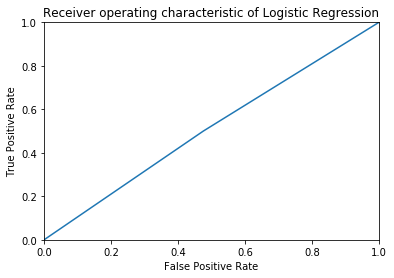

The AUC value for Logistic Regression(UnderSampling) is: 0.5121951219512195


In [56]:
fpr, tpr, thresholds = roc_curve(ytest_u, pred_lr)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Logistic Regression')
plt.show()
roc_auc = auc(fpr, tpr)
print('The AUC value for Logistic Regression(UnderSampling) is:',roc_auc)

### Decision Tree

In [57]:
xtrain, xtest, ytrain, ytest = train_test_split(data_clean, y, test_size=0.3, random_state=11)

In [58]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth=7, random_state=7)
dt.fit(xtrain,ytrain)
THRESHOLD = 0.5
pred_dt = np.where((dt.predict_proba(xtest)[:,1] >= THRESHOLD), 1, 0)

pd.DataFrame(data=[accuracy_score(ytest, pred_dt)*100, recall_score(ytest, pred_dt)*100,
                   precision_score(ytest, pred_dt)*100, roc_auc_score(ytest, pred_dt)*100], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,94.186047
recall,16.666667
precision,28.571429
roc_auc_score,57.317073


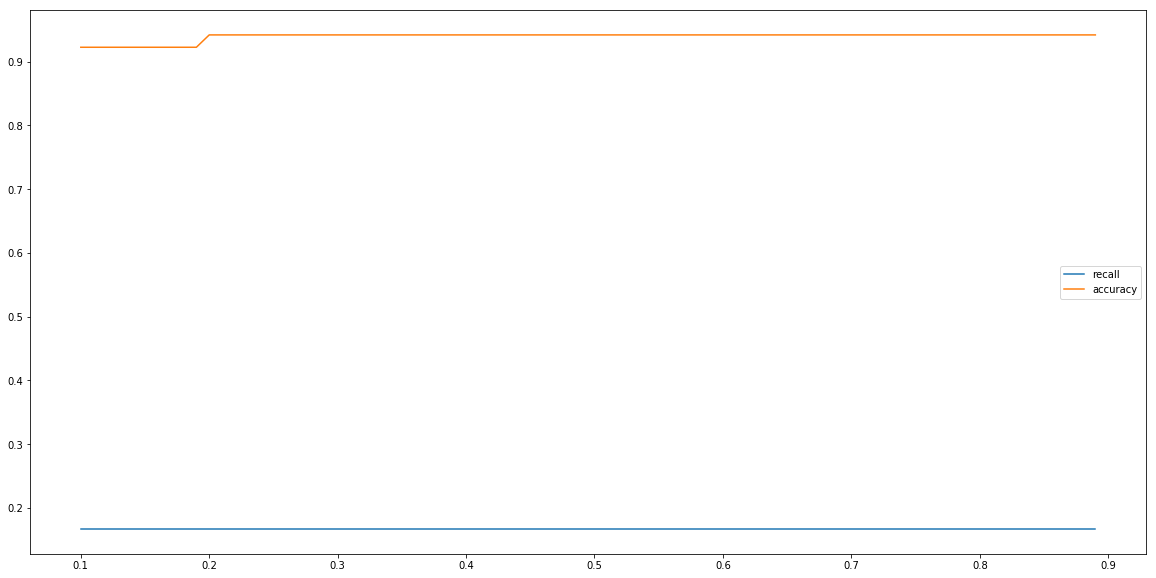

In [59]:
pred_prob=dt.predict_proba(xtest)[:,1]
ind=[]
recall=[]
accuracy=[]
li=np.arange(.1,.9,0.01)
for i in li:
    pred=np.where(pred_prob<i,0,1)
    recall.append(metrics.recall_score(ytest,pred))
    accuracy.append(metrics.accuracy_score(ytest,pred))
    ind.append(i)
plt.figure(figsize=(20,10))
plt.plot(li,recall,label='recall')
plt.plot(li,accuracy,label='accuracy')
plt.legend(loc='best')

In [60]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth=7, random_state=7)
dt.fit(xtrain,ytrain)
THRESHOLD = 0.15
pred_dt = np.where((dt.predict_proba(xtest)[:,1] >= THRESHOLD), 1, 0)

pd.DataFrame(data=[accuracy_score(ytest, pred_dt)*100, recall_score(ytest, pred_dt)*100,
                   precision_score(ytest, pred_dt)*100, roc_auc_score(ytest, pred_dt)*100], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,92.248062
recall,16.666667
precision,16.666667
roc_auc_score,56.300813


In [61]:
print(classification_report(ytest, pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       246
           1       0.17      0.17      0.17        12

   micro avg       0.92      0.92      0.92       258
   macro avg       0.56      0.56      0.56       258
weighted avg       0.92      0.92      0.92       258



In [62]:
confusion_matrix(ytest, pred_dt)

array([[236,  10],
       [ 10,   2]], dtype=int64)

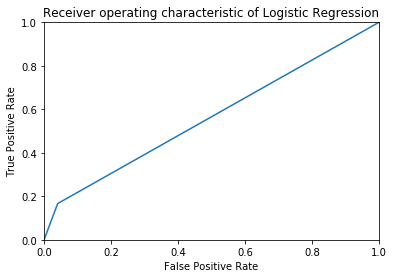

The AUC value for Decision Tree is: 0.5630081300813008


In [63]:
fpr, tpr, thresholds = roc_curve(ytest, pred_dt)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Logistic Regression')
plt.show()
roc_auc = auc(fpr, tpr)
print('The AUC value for Decision Tree is:',roc_auc)

### Decision Tree(Feature Importance)

# IMPORTANT FEATURES
*	Using the “feature_importances_” feature of tree-based algorithms, only features that were significant to predicting the target variable Biopsy were considered for modelling.




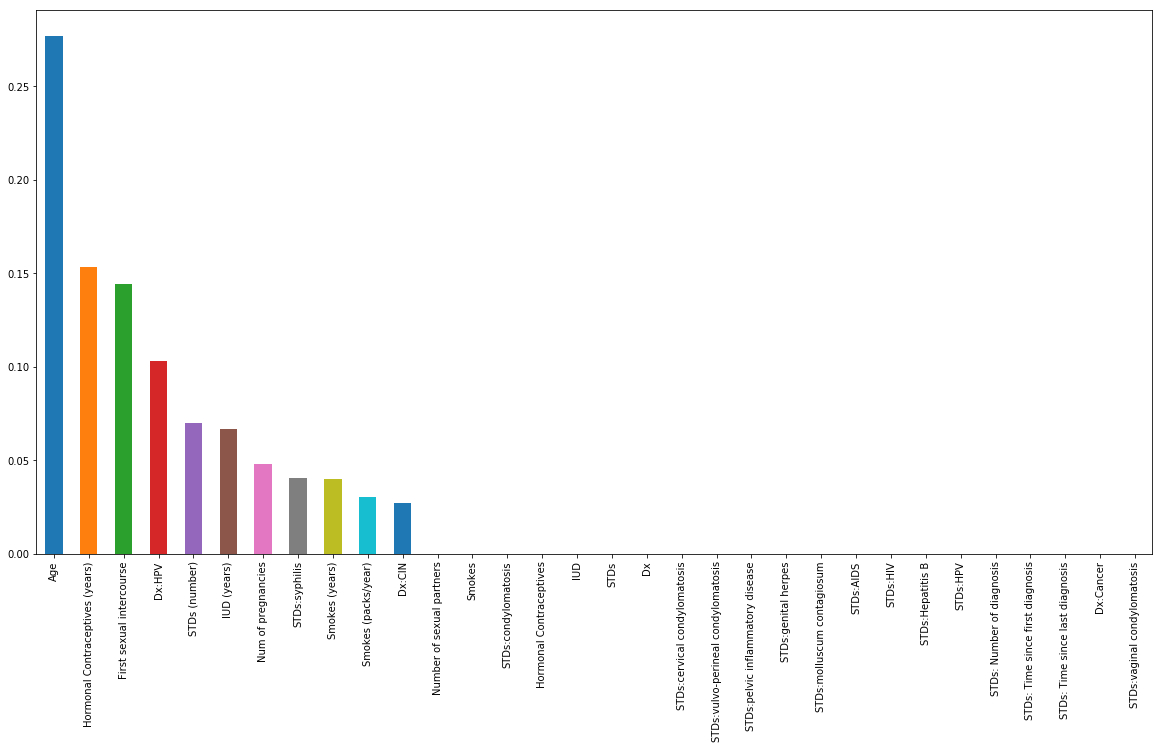

In [64]:
feature_importances= pd.Series(dt.feature_importances_, index=data_clean.columns).sort_values(ascending=False)
feature_importances.plot(kind="bar", figsize=(20,10))

In [65]:
x_imp = data_clean[['Age', 'First sexual intercourse', 'Num of pregnancies', 'Smokes (years)',
           'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'STDs:syphilis', 'IUD (years)',
           'STDs (number)', 'Dx:CIN', 'Dx:HPV']]

In [66]:
xtrain, xtest, ytrain, ytest = train_test_split(x_imp, y, test_size=0.3, random_state=11)

In [67]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth=7, random_state=7)
dt.fit(xtrain,ytrain)
THRESHOLD = 0.5
pred_dt = np.where((dt.predict_proba(xtest)[:,1] >= THRESHOLD), 1, 0)

pd.DataFrame(data=[accuracy_score(ytest, pred_dt)*100, recall_score(ytest, pred_dt)*100,
                   precision_score(ytest, pred_dt)*100, roc_auc_score(ytest, pred_dt)*100], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,94.186047
recall,16.666667
precision,28.571429
roc_auc_score,57.317073


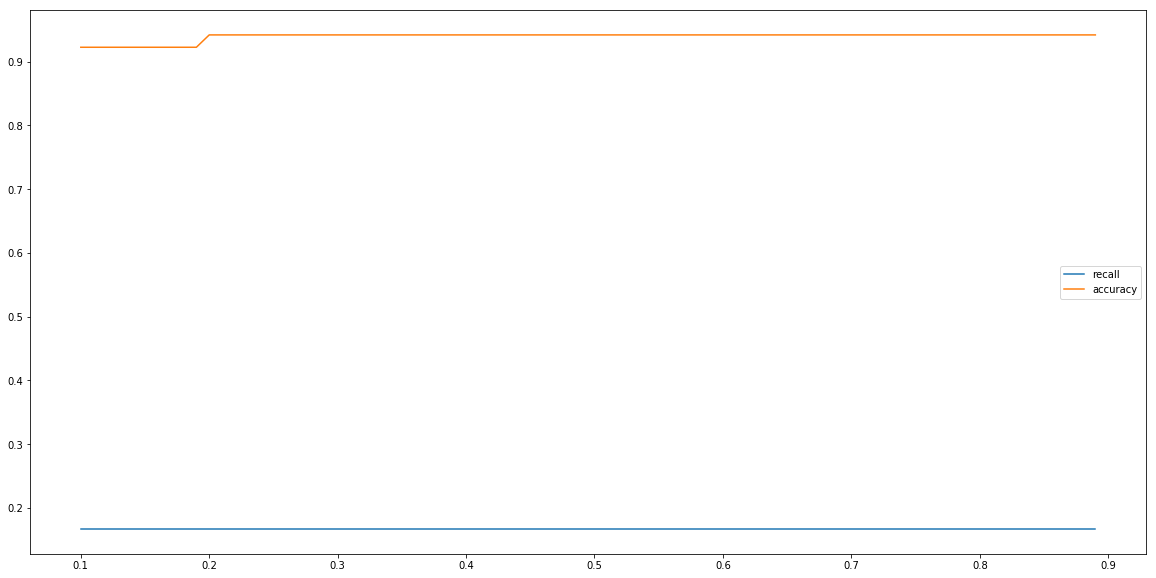

In [68]:
pred_prob=dt.predict_proba(xtest)[:,1]
ind=[]
recall=[]
accuracy=[]
li=np.arange(.1,.9,0.01)
for i in li:
    pred=np.where(pred_prob<i,0,1)
    recall.append(metrics.recall_score(ytest,pred))
    accuracy.append(metrics.accuracy_score(ytest,pred))
    ind.append(i)
plt.figure(figsize=(20,10))
plt.plot(li,recall,label='recall')
plt.plot(li,accuracy,label='accuracy')
plt.legend(loc='best')

In [69]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth=7, random_state=7)
dt.fit(xtrain,ytrain)
THRESHOLD = 0.15
pred_dt = np.where((dt.predict_proba(xtest)[:,1] >= THRESHOLD), 1, 0)

pd.DataFrame(data=[accuracy_score(ytest, pred_dt)*100, recall_score(ytest, pred_dt)*100,
                   precision_score(ytest, pred_dt)*100, roc_auc_score(ytest, pred_dt)*100], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,92.248062
recall,16.666667
precision,16.666667
roc_auc_score,56.300813


In [70]:
print(classification_report(ytest, pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       246
           1       0.17      0.17      0.17        12

   micro avg       0.92      0.92      0.92       258
   macro avg       0.56      0.56      0.56       258
weighted avg       0.92      0.92      0.92       258



In [71]:
confusion_matrix(ytest, pred_dt)

array([[236,  10],
       [ 10,   2]], dtype=int64)

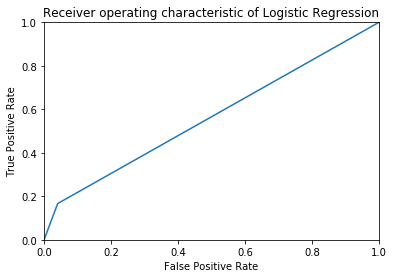

The AUC value for Decision Tree is: 0.5630081300813008


In [72]:
fpr, tpr, thresholds = roc_curve(ytest, pred_dt)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Logistic Regression')
plt.show()
roc_auc = auc(fpr, tpr)
print('The AUC value for Decision Tree is:',roc_auc)

In [73]:
data_derive = data_derive[data_derive.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]

### Decision Tree with Derived Variables

In [74]:
xtrain, xtest, ytrain, ytest = train_test_split(data_derive, y, test_size=0.3, random_state=11)

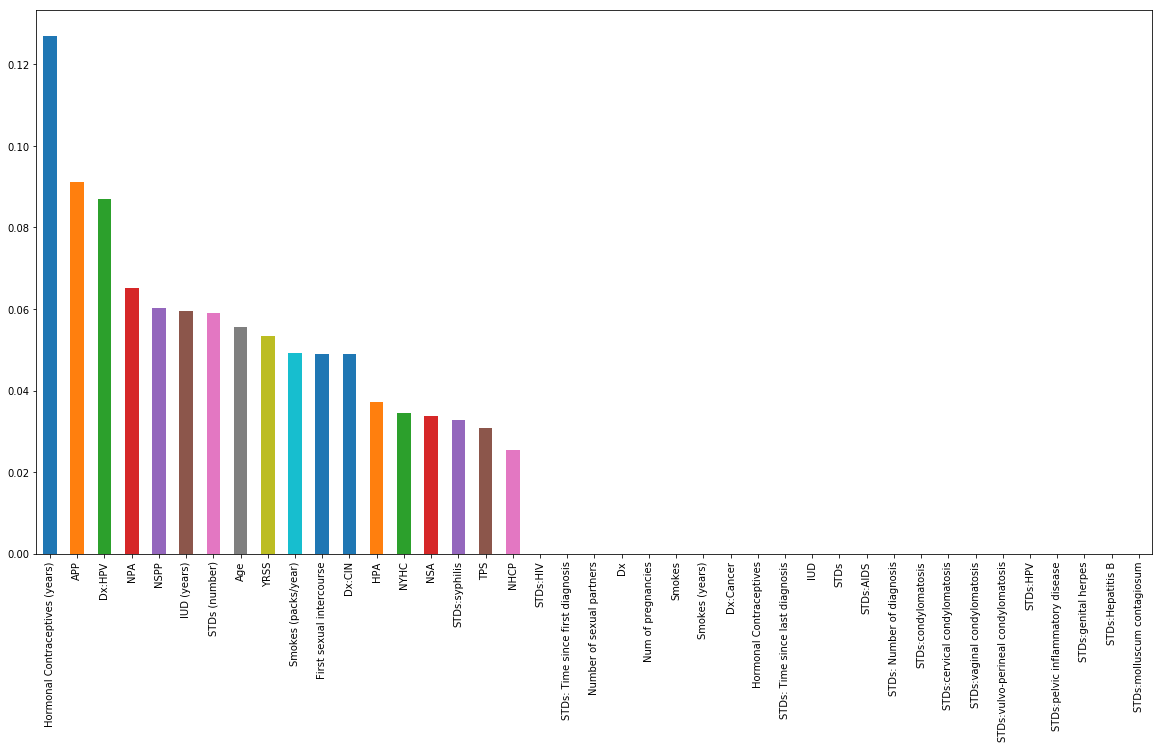

In [75]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth=7, random_state=7)
dt.fit(xtrain,ytrain)
feature_importances= pd.Series(dt.feature_importances_, index=data_derive.columns).sort_values(ascending=False)
feature_importances.plot(kind="bar", figsize=(20,10))

In [76]:
data_derive.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'YRSS', 'NSPP', 'HPA', 'TPS',
       'NPA', 'NSA', 'NYHC', 'APP', 'NHCP'],
      dtype='object')

In [77]:
x_imp = data_derive[['Age','Hormonal Contraceptives (years)','APP','Dx:HPV','NPA','NSPP','IUD (years)','STDs (number)',
                    'YRSS','Smokes (packs/year)','First sexual intercourse','Dx:CIN','HPA','NYHC','NSA','STDs:syphilis',
                    'TPS','NHCP']]

In [78]:
xtrain, xtest, ytrain, ytest = train_test_split(x_imp, y, test_size=0.3, random_state=11)

In [79]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth=7, random_state=7)
dt.fit(xtrain,ytrain)
THRESHOLD = 0.5
pred_dt = np.where((dt.predict_proba(xtest)[:,1] >= THRESHOLD), 1, 0)

pd.DataFrame(data=[accuracy_score(ytest, pred_dt)*100, recall_score(ytest, pred_dt)*100,
                   precision_score(ytest, pred_dt)*100, roc_auc_score(ytest, pred_dt)*100], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,92.635659
recall,8.333333
precision,11.111111
roc_auc_score,52.540650


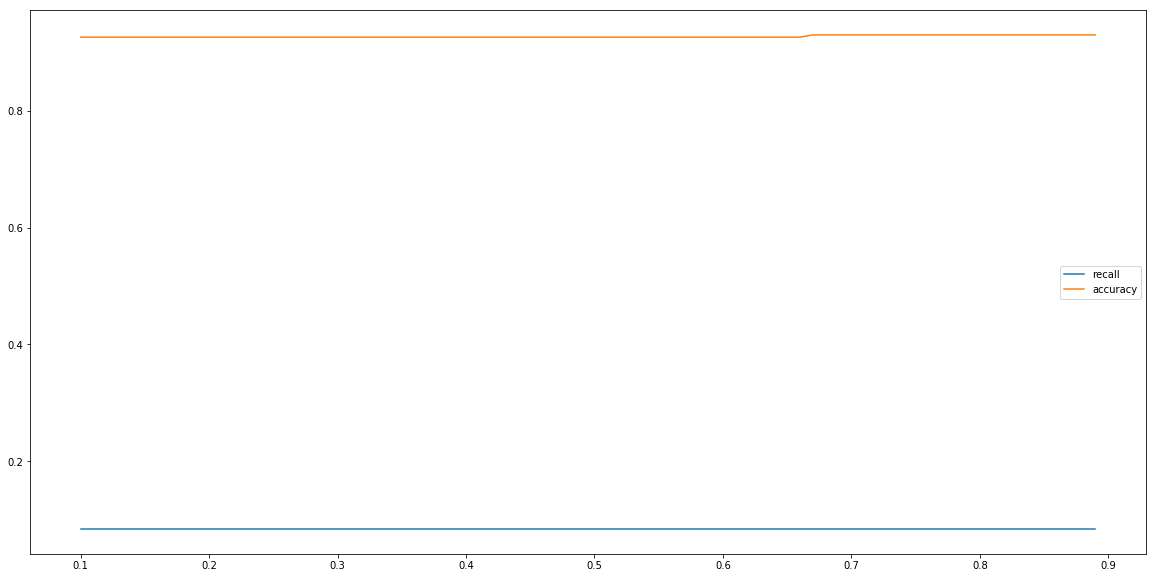

In [80]:
pred_prob=dt.predict_proba(xtest)[:,1]
ind=[]
recall=[]
accuracy=[]
li=np.arange(.1,.9,0.01)
for i in li:
    pred=np.where(pred_prob<i,0,1)
    recall.append(metrics.recall_score(ytest,pred))
    accuracy.append(metrics.accuracy_score(ytest,pred))
    ind.append(i)
plt.figure(figsize=(20,10))
plt.plot(li,recall,label='recall')
plt.plot(li,accuracy,label='accuracy')
plt.legend(loc='best')

In [81]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth=7, random_state=7)
dt.fit(xtrain,ytrain)
THRESHOLD = 0.15
pred_dt = np.where((dt.predict_proba(xtest)[:,1] >= THRESHOLD), 1, 0)

pd.DataFrame(data=[accuracy_score(ytest, pred_dt)*100, recall_score(ytest, pred_dt)*100,
                   precision_score(ytest, pred_dt)*100, roc_auc_score(ytest, pred_dt)*100], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,92.635659
recall,8.333333
precision,11.111111
roc_auc_score,52.540650


In [82]:
print(classification_report(ytest, pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       246
           1       0.11      0.08      0.10        12

   micro avg       0.93      0.93      0.93       258
   macro avg       0.53      0.53      0.53       258
weighted avg       0.92      0.93      0.92       258



In [83]:
confusion_matrix(ytest, pred_dt)

array([[238,   8],
       [ 11,   1]], dtype=int64)

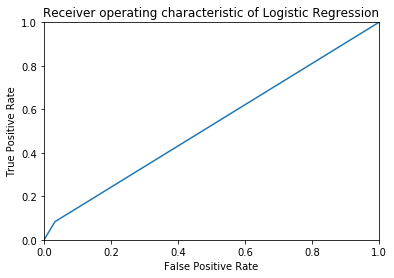

The AUC value for Decision Tree is: 0.5254065040650406


In [84]:
fpr, tpr, thresholds = roc_curve(ytest, pred_dt)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Logistic Regression')
plt.show()
roc_auc = auc(fpr, tpr)
print('The AUC value for Decision Tree is:',roc_auc)

### Decision Tree SMOTE

* Oversampling using SMOTE not only increases the size of the training data set, it also increases the variety. It creates new (artificial) training examples based on the original training examples and adds them as synthetic data points on which the model can be build.


In [85]:
xtrain_s, xtest_s, ytrain_s, ytest_s = train_test_split(x_imp, y, test_size=0.3, random_state=11)

In [86]:
from imblearn.over_sampling import SMOTE
ros = SMOTE(random_state = 5)
xtrain_s, ytrain_s = ros.fit_resample(xtrain_s, ytrain_s)

In [87]:
xtrain_s = pd.DataFrame(xtrain_s, columns=x_imp.columns)
ytrain_s = pd.DataFrame(ytrain_s, columns=['Biopsy'])
ytrain_s.Biopsy.value_counts()

1    557
0    557
Name: Biopsy, dtype: int64

In [88]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth=7, random_state=7)
dt.fit(xtrain_s,ytrain_s)
THRESHOLD = 0.5
pred_dt = np.where((dt.predict_proba(xtest_s)[:,1] >= THRESHOLD), 1, 0)

pd.DataFrame(data=[accuracy_score(ytest_s, pred_dt)*100, recall_score(ytest_s, pred_dt)*100,
                   precision_score(ytest_s, pred_dt)*100, roc_auc_score(ytest_s, pred_dt)*100], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,91.860465
recall,0.000000
precision,0.000000
roc_auc_score,48.170732


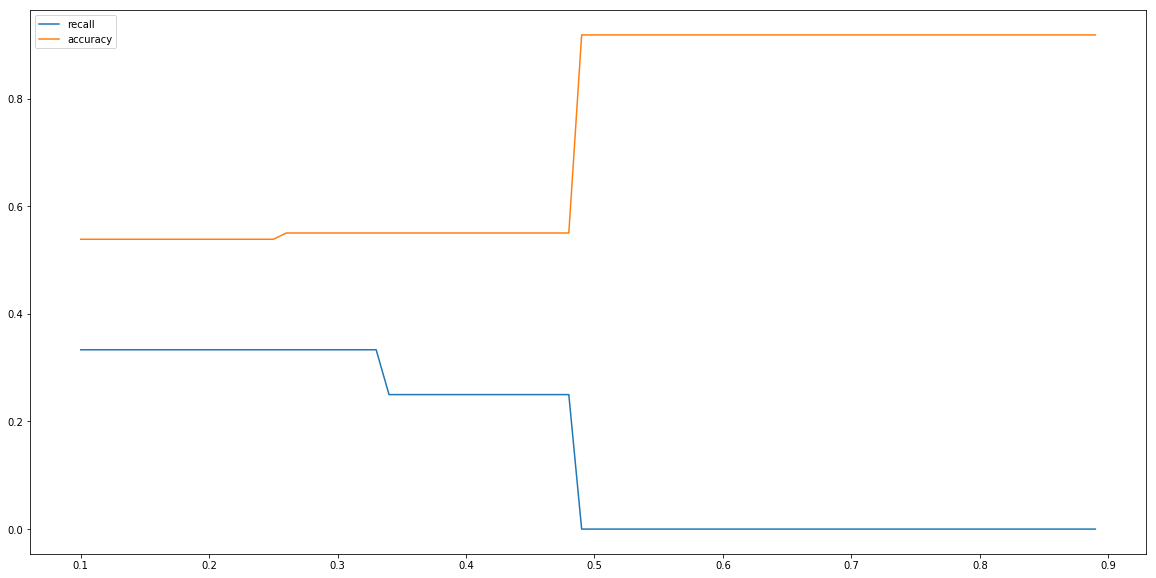

In [89]:
pred_prob=dt.predict_proba(xtest_s)[:,1]
ind=[]
recall=[]
accuracy=[]
li=np.arange(.1,.9,0.01)
for i in li:
    pred=np.where(pred_prob<i,0,1)
    recall.append(metrics.recall_score(ytest_s,pred))
    accuracy.append(metrics.accuracy_score(ytest_s,pred))
    ind.append(i)
plt.figure(figsize=(20,10))
plt.plot(li,recall,label='recall')
plt.plot(li,accuracy,label='accuracy')
plt.legend(loc='best')

In [90]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth=7, random_state=7)
dt.fit(xtrain_s,ytrain_s)
THRESHOLD = 0.2
pred_dt = np.where((dt.predict_proba(xtest_s)[:,1] >= THRESHOLD), 1, 0)

pd.DataFrame(data=[accuracy_score(ytest_s, pred_dt)*100, recall_score(ytest_s, pred_dt)*100,
                   precision_score(ytest_s, pred_dt)*100, roc_auc_score(ytest_s, pred_dt)*100], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,53.875969
recall,33.333333
precision,3.478261
roc_auc_score,44.105691


In [91]:
print(classification_report(ytest_s, pred_dt))

              precision    recall  f1-score   support

           0       0.94      0.55      0.69       246
           1       0.03      0.33      0.06        12

   micro avg       0.54      0.54      0.54       258
   macro avg       0.49      0.44      0.38       258
weighted avg       0.90      0.54      0.66       258



In [92]:
confusion_matrix(ytest_s, pred_dt)

array([[135, 111],
       [  8,   4]], dtype=int64)

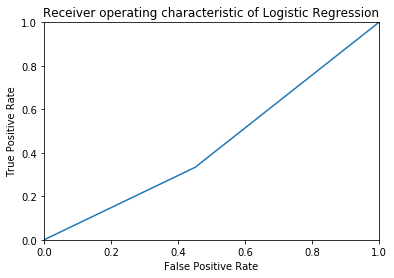

The AUC value for Decision Tree(SMOTE) is: 0.4410569105691057


In [93]:
fpr, tpr, thresholds = roc_curve(ytest_s, pred_dt)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Logistic Regression')
plt.show()
roc_auc = auc(fpr, tpr)
print('The AUC value for Decision Tree(SMOTE) is:',roc_auc)

### Decision Tree OverSampling

•	Over-Sampling increases the number of instances in the minority class by randomly replicating them in order to present a higher representation of the minority class in the sample.

In [94]:
xtrain_o, xtest_o, ytrain_o, ytest_o = train_test_split(x_imp, y, test_size=0.3, random_state=11)

In [95]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0,ratio=0.625)
xtrain_o, ytrain_o = ros.fit_resample(xtrain_o, ytrain_o)

In [96]:
xtrain_o = pd.DataFrame(xtrain_o, columns=x_imp.columns)
ytrain_o = pd.DataFrame(ytrain_o, columns=['Biopsy'])
ytrain_o.Biopsy.value_counts()

0    557
1    348
Name: Biopsy, dtype: int64

In [97]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth=7, random_state=7)
dt.fit(xtrain_o,ytrain_o)
THRESHOLD = 0.5
pred_dt = np.where((dt.predict_proba(xtest_o)[:,1] >= THRESHOLD), 1, 0)

pd.DataFrame(data=[accuracy_score(ytest_o, pred_dt)*100, recall_score(ytest_o, pred_dt)*100,
                   precision_score(ytest_o, pred_dt)*100, roc_auc_score(ytest_o, pred_dt)*100], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,67.829457
recall,16.666667
precision,2.666667
roc_auc_score,43.495935


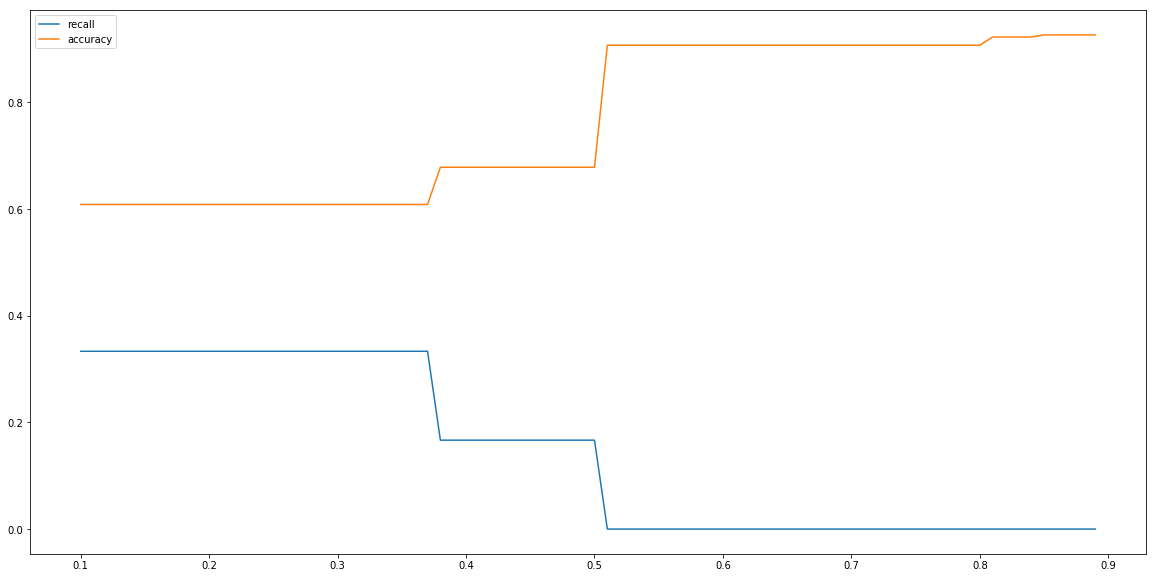

In [98]:
pred_prob=dt.predict_proba(xtest_o)[:,1]
ind=[]
recall=[]
accuracy=[]
li=np.arange(.1,.9,0.01)
for i in li:
    pred=np.where(pred_prob<i,0,1)
    recall.append(metrics.recall_score(ytest_s,pred))
    accuracy.append(metrics.accuracy_score(ytest_s,pred))
    ind.append(i)
plt.figure(figsize=(20,10))
plt.plot(li,recall,label='recall')
plt.plot(li,accuracy,label='accuracy')
plt.legend(loc='best')

In [99]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth=7, random_state=7)
dt.fit(xtrain_o,ytrain_o)
THRESHOLD = 0.2
pred_dt = np.where((dt.predict_proba(xtest_o)[:,1] >= THRESHOLD), 1, 0)

pd.DataFrame(data=[accuracy_score(ytest_o, pred_dt)*100, recall_score(ytest_o, pred_dt)*100,
                   precision_score(ytest_o, pred_dt)*100, roc_auc_score(ytest_o, pred_dt)*100], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,60.852713
recall,33.333333
precision,4.123711
roc_auc_score,47.764228


In [100]:
print(classification_report(ytest_o, pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.62      0.75       246
           1       0.04      0.33      0.07        12

   micro avg       0.61      0.61      0.61       258
   macro avg       0.50      0.48      0.41       258
weighted avg       0.91      0.61      0.72       258



In [101]:
confusion_matrix(ytest_o, pred_dt)

array([[153,  93],
       [  8,   4]], dtype=int64)

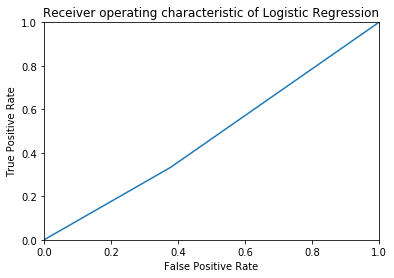

The AUC value for Decision Tree(OverSampling) is: 0.4776422764227642


In [102]:
fpr, tpr, thresholds = roc_curve(ytest_o, pred_dt)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Logistic Regression')
plt.show()
roc_auc = auc(fpr, tpr)
print('The AUC value for Decision Tree(OverSampling) is:',roc_auc)

### Decision Tree UnderSampling

•	Under-Sampling decreases the number of samples of the majority class on which the models are trained so that a more balanced proportion of representation of the minority class is achieved.

In [103]:
xtrain_u, xtest_u, ytrain_u, ytest_u = train_test_split(x_imp, y, test_size=0.3, random_state=11)

In [104]:
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=0,ratio=0.625)
xtrain_u, ytrain_u = ros.fit_resample(xtrain_u, ytrain_u)

In [105]:
xtrain_u = pd.DataFrame(xtrain_u, columns=x_imp.columns)
ytrain_u = pd.DataFrame(ytrain_u, columns=['Biopsy'])
ytrain_u.Biopsy.value_counts()

0    68
1    43
Name: Biopsy, dtype: int64

In [106]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth=7, random_state=7)
dt.fit(xtrain_u,ytrain_u)
THRESHOLD = 0.5
pred_dt = np.where((dt.predict_proba(xtest_u)[:,1] >= THRESHOLD), 1, 0)

pd.DataFrame(data=[accuracy_score(ytest_u, pred_dt)*100, recall_score(ytest_u, pred_dt)*100,
                   precision_score(ytest_u, pred_dt)*100, roc_auc_score(ytest_u, pred_dt)*100], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,80.232558
recall,16.666667
precision,4.651163
roc_auc_score,50.000000


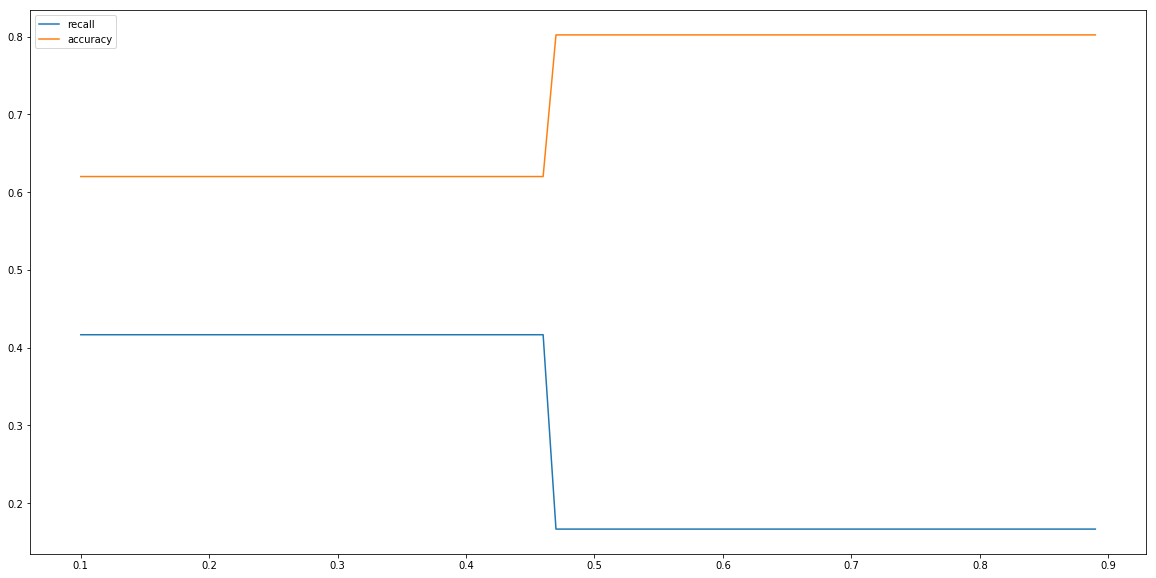

In [107]:
pred_prob=dt.predict_proba(xtest_u)[:,1]
ind=[]
recall=[]
accuracy=[]
li=np.arange(.1,.9,0.01)
for i in li:
    pred=np.where(pred_prob<i,0,1)
    recall.append(metrics.recall_score(ytest_u,pred))
    accuracy.append(metrics.accuracy_score(ytest_u,pred))
    ind.append(i)
plt.figure(figsize=(20,10))
plt.plot(li,recall,label='recall')
plt.plot(li,accuracy,label='accuracy')
plt.legend(loc='best')

In [108]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth=7, random_state=7)
dt.fit(xtrain_u,ytrain_u)
THRESHOLD = 0.3
pred_dt = np.where((dt.predict_proba(xtest_u)[:,1] >= THRESHOLD), 1, 0)

pd.DataFrame(data=[accuracy_score(ytest_u, pred_dt)*100, recall_score(ytest_u, pred_dt)*100,
                   precision_score(ytest_u, pred_dt)*100, roc_auc_score(ytest_u, pred_dt)*100], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,62.015504
recall,41.666667
precision,5.208333
roc_auc_score,52.337398


In [109]:
print(classification_report(ytest_u, pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.63      0.76       246
           1       0.05      0.42      0.09        12

   micro avg       0.62      0.62      0.62       258
   macro avg       0.50      0.52      0.43       258
weighted avg       0.91      0.62      0.73       258



In [110]:
confusion_matrix(ytest_u, pred_dt)

array([[155,  91],
       [  7,   5]], dtype=int64)

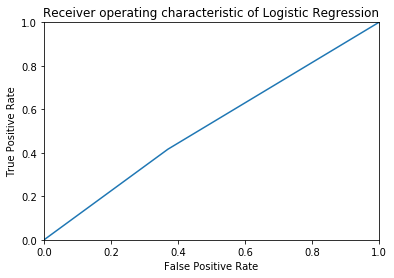

The AUC value for Decision Tree(UnderSampling) is: 0.5233739837398375


In [111]:
fpr, tpr, thresholds = roc_curve(ytest_u, pred_dt)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Logistic Regression')
plt.show()
roc_auc = auc(fpr, tpr)
print('The AUC value for Decision Tree(UnderSampling) is:',roc_auc)

### Random Forest

In [112]:
xtrain, xtest, ytrain, ytest = train_test_split(data_clean, y, test_size=0.3, random_state=11)

In [113]:
rf = RandomForestClassifier(n_estimators=200, criterion = 'entropy',max_features='sqrt', max_depth=7, random_state=7)
rf.fit(xtrain,ytrain)
THRESHOLD = 0.5
pred_rf = np.where((rf.predict_proba(xtest)[:,1] >= THRESHOLD), 1, 0)

pd.DataFrame(data=[accuracy_score(ytest, pred_rf)*100, recall_score(ytest, pred_rf)*100,
                   precision_score(ytest, pred_rf)*100, roc_auc_score(ytest, pred_rf)*100], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,94.961240
recall,0.000000
precision,0.000000
roc_auc_score,49.796748


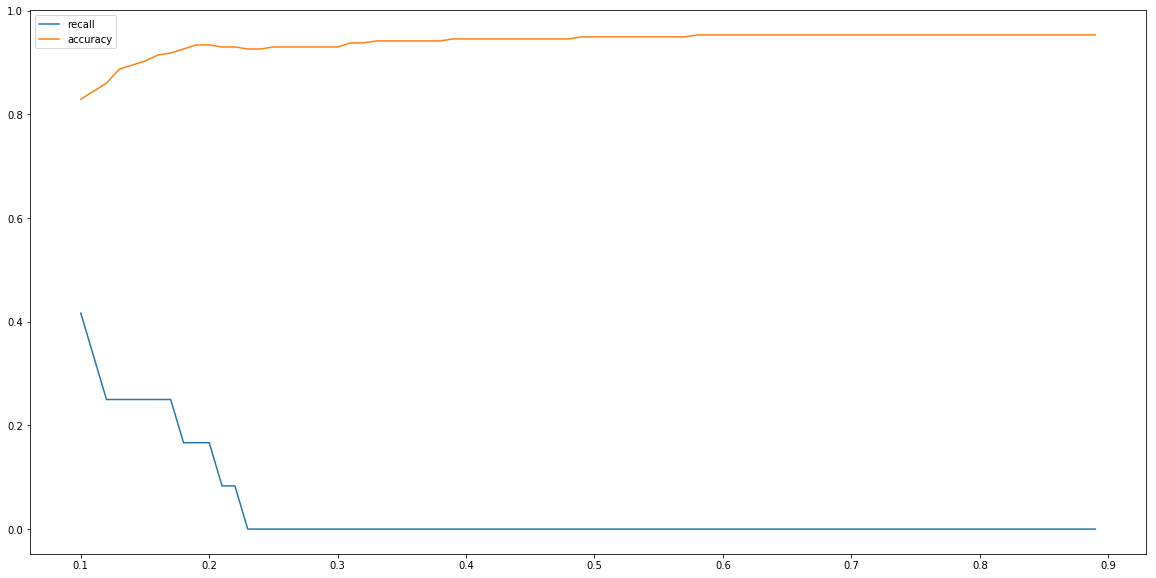

In [114]:
pred_prob=rf.predict_proba(xtest)[:,1]
ind=[]
recall=[]
accuracy=[]
li=np.arange(.1,.9,0.01)
for i in li:
    pred=np.where(pred_prob<i,0,1)
    recall.append(metrics.recall_score(ytest,pred))
    accuracy.append(metrics.accuracy_score(ytest,pred))
    ind.append(i)
plt.figure(figsize=(20,10))
plt.plot(li,recall,label='recall')
plt.plot(li,accuracy,label='accuracy')
plt.legend(loc='best')

In [115]:
rf = RandomForestClassifier(n_estimators=200, criterion = 'entropy',max_features='sqrt', max_depth=7, random_state=7)
rf.fit(xtrain,ytrain)
THRESHOLD = 0.1
pred_rf = np.where((rf.predict_proba(xtest)[:,1] >= THRESHOLD), 1, 0)

pd.DataFrame(data=[accuracy_score(ytest, pred_rf)*100, recall_score(ytest, pred_rf)*100,
                   precision_score(ytest, pred_rf)*100, roc_auc_score(ytest, pred_rf)*100], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,82.945736
recall,41.666667
precision,11.904762
roc_auc_score,63.313008


In [116]:
print(classification_report(ytest, pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.85      0.90       246
           1       0.12      0.42      0.19        12

   micro avg       0.83      0.83      0.83       258
   macro avg       0.54      0.63      0.54       258
weighted avg       0.93      0.83      0.87       258



In [117]:
confusion_matrix(ytest, pred_rf)

array([[209,  37],
       [  7,   5]], dtype=int64)

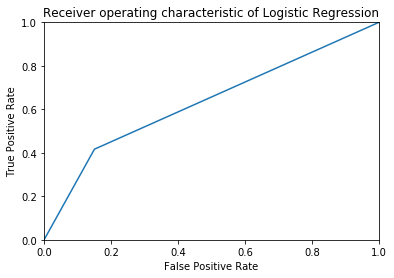

The AUC value for Decision Tree is: 0.633130081300813


In [118]:
fpr, tpr, thresholds = roc_curve(ytest, pred_rf)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Logistic Regression')
plt.show()
roc_auc = auc(fpr, tpr)
print('The AUC value for Decision Tree is:',roc_auc)

### Random Forest(Feature Importance)

•	Using the “feature_importances_” feature of tree-based algorithms, only features that were significant to predicting the target variable Biopsy were considered for modelling.

In [119]:
xtrain, xtest, ytrain, ytest = train_test_split(data_derive, y, test_size=0.3, random_state=11)

In [120]:
rf = RandomForestClassifier(n_estimators=200, criterion = 'entropy',max_features='sqrt', max_depth=7, random_state=7)
rf.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=7, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=7, verbose=0, warm_start=False)

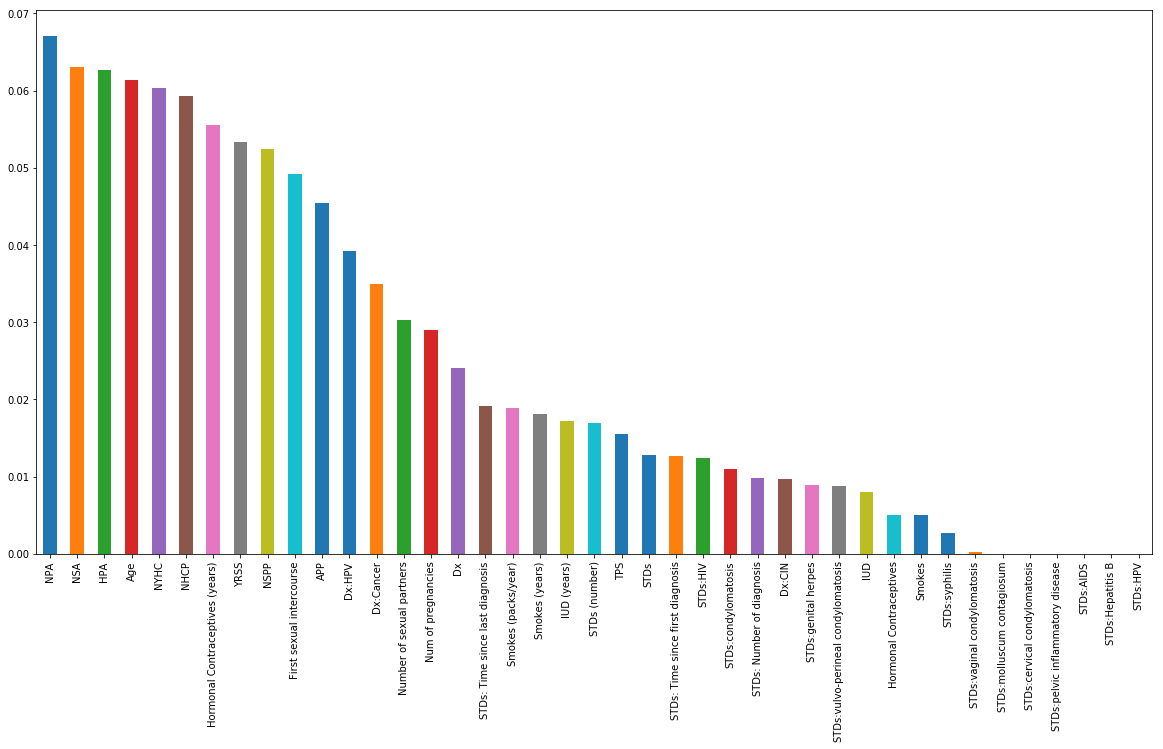

In [121]:
feature_importances= pd.Series(rf.feature_importances_, index=data_derive.columns).sort_values(ascending=False)
feature_importances.plot(kind="bar", figsize=(20,10))

In [122]:
x_imp = data_clean[['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes (years)',
           'Smokes (packs/year)', 'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD','IUD (years)',
           'STDs (number)', 'STDs:condylomatosis', 'STDs:genital herpes', 'STDs:HIV', 'STDs: Time since first diagnosis',
           'STDs: Time since last diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx']]

In [123]:
xtrain, xtest, ytrain, ytest = train_test_split(x_imp, y, test_size=0.3, random_state=11)

In [124]:
rf = RandomForestClassifier(n_estimators=200, criterion = 'entropy',max_features='sqrt', max_depth=7, random_state=7)
rf.fit(xtrain,ytrain)
THRESHOLD = 0.5
pred_rf = np.where((rf.predict_proba(xtest)[:,1] >= THRESHOLD), 1, 0)

pd.DataFrame(data=[accuracy_score(ytest, pred_rf)*100, recall_score(ytest, pred_rf)*100,
                   precision_score(ytest, pred_rf)*100, roc_auc_score(ytest, pred_rf)*100], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,94.961240
recall,0.000000
precision,0.000000
roc_auc_score,49.796748


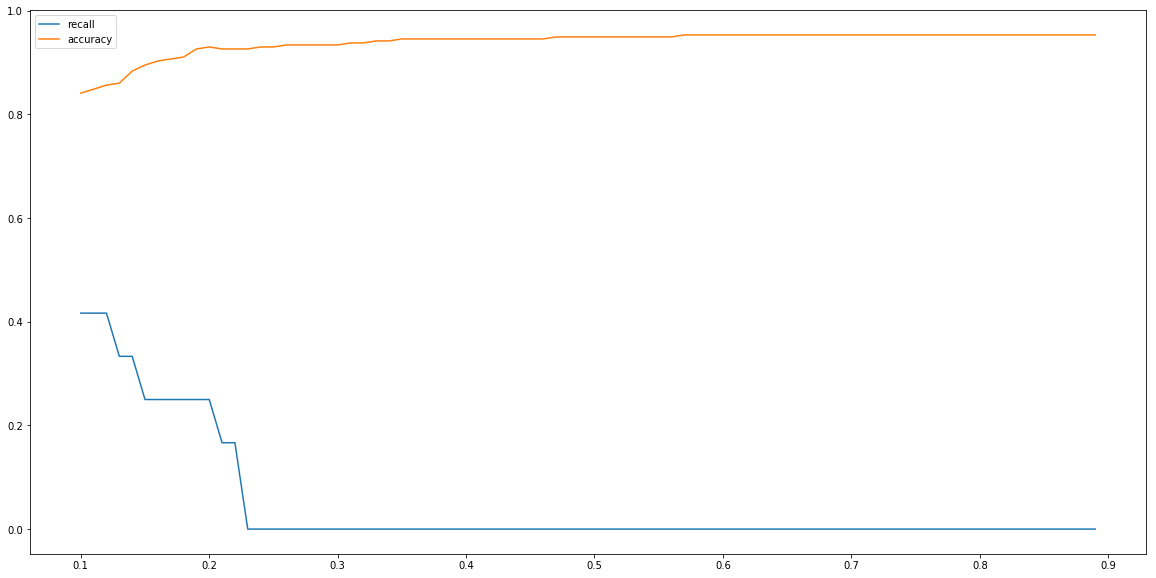

In [125]:
pred_prob=rf.predict_proba(xtest)[:,1]
ind=[]
recall=[]
accuracy=[]
li=np.arange(.1,.9,0.01)
for i in li:
    pred=np.where(pred_prob<i,0,1)
    recall.append(metrics.recall_score(ytest,pred))
    accuracy.append(metrics.accuracy_score(ytest,pred))
    ind.append(i)
plt.figure(figsize=(20,10))
plt.plot(li,recall,label='recall')
plt.plot(li,accuracy,label='accuracy')
plt.legend(loc='best')

In [126]:
rf = RandomForestClassifier(n_estimators=200, criterion = 'entropy',max_features='sqrt', max_depth=7, random_state=7)
rf.fit(xtrain,ytrain)
THRESHOLD = 0.1
pred_rf = np.where((rf.predict_proba(xtest)[:,1] >= THRESHOLD), 1, 0)

pd.DataFrame(data=[accuracy_score(ytest, pred_rf)*100, recall_score(ytest, pred_rf)*100,
                   precision_score(ytest, pred_rf)*100, roc_auc_score(ytest, pred_rf)*100], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,84.108527
recall,41.666667
precision,12.820513
roc_auc_score,63.922764


In [127]:
print(classification_report(ytest, pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       246
           1       0.13      0.42      0.20        12

   micro avg       0.84      0.84      0.84       258
   macro avg       0.55      0.64      0.55       258
weighted avg       0.93      0.84      0.88       258



In [128]:
confusion_matrix(ytest, pred_rf)

array([[212,  34],
       [  7,   5]], dtype=int64)

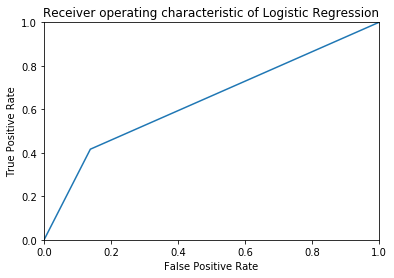

The AUC value for Decision Tree is: 0.6392276422764228


In [129]:
fpr, tpr, thresholds = roc_curve(ytest, pred_rf)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Logistic Regression')
plt.show()
roc_auc = auc(fpr, tpr)
print('The AUC value for Decision Tree is:',roc_auc)

### Random Forest with Derived Variables

### IMPORTANT FEATURES
* Using the “feature_importances_” feature of tree-based algorithms, only features that were significant to predicting the target variable Biopsy were considered for modelling.




In [130]:
xtrain, xtest, ytrain, ytest = train_test_split(data_derive, y, test_size=0.3, random_state=11)

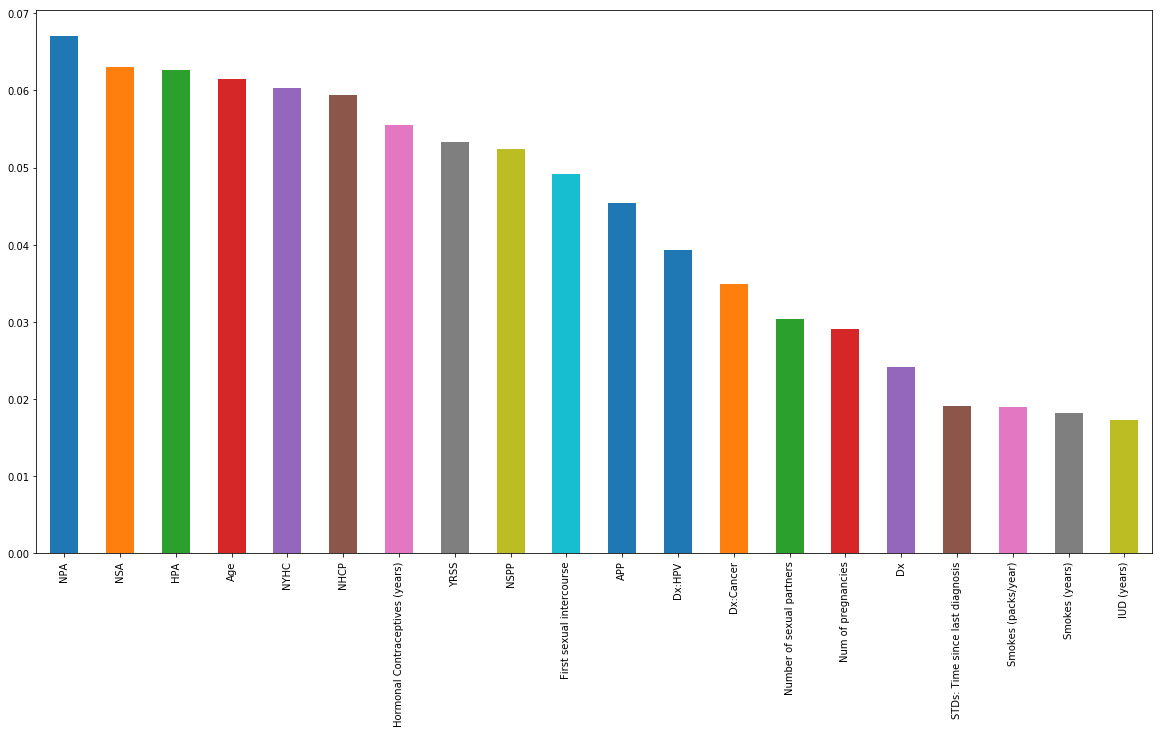

In [131]:
rf = RandomForestClassifier(n_estimators=200, criterion = 'entropy',max_features='sqrt', max_depth=7, random_state=7)
rf.fit(xtrain,ytrain)
feature_importances= pd.Series(rf.feature_importances_, index=data_derive.columns).sort_values(ascending=False)
feature_importances.head(20).plot(kind="bar", figsize=(20,10))

In [132]:
x_imp = data_derive[['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives (years)',
       'IUD (years)', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx', 'YRSS', 'NSPP', 'HPA','Dx:HPV',
       'NPA', 'NSA', 'NYHC', 'APP', 'NHCP']]

In [133]:
xtrain, xtest, ytrain, ytest = train_test_split(x_imp, y, test_size=0.3, random_state=11)

In [134]:
rf = RandomForestClassifier(n_estimators=200, criterion = 'entropy',max_features='sqrt', max_depth=7, random_state=7)
rf.fit(xtrain,ytrain)
THRESHOLD = 0.5
pred_rf = np.where((rf.predict_proba(xtest)[:,1] >= THRESHOLD), 1, 0)

pd.DataFrame(data=[accuracy_score(ytest, pred_rf)*100, recall_score(ytest, pred_rf)*100,
                   precision_score(ytest, pred_rf)*100, roc_auc_score(ytest, pred_rf)*100], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,95.348837
recall,0.000000
precision,0.000000
roc_auc_score,50.000000


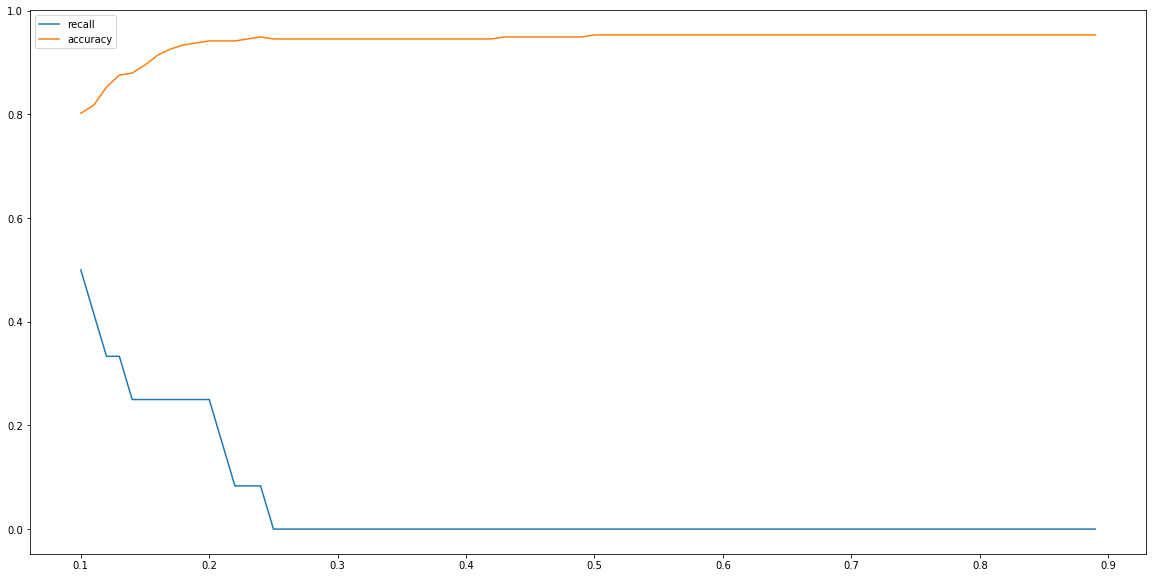

In [135]:
pred_prob=rf.predict_proba(xtest)[:,1]
ind=[]
recall=[]
accuracy=[]
li=np.arange(.1,.9,0.01)
for i in li:
    pred=np.where(pred_prob<i,0,1)
    recall.append(metrics.recall_score(ytest,pred))
    accuracy.append(metrics.accuracy_score(ytest,pred))
    ind.append(i)
plt.figure(figsize=(20,10))
plt.plot(li,recall,label='recall')
plt.plot(li,accuracy,label='accuracy')
plt.legend(loc='best')

In [136]:
rf = RandomForestClassifier(n_estimators=200, criterion = 'entropy',max_features='sqrt', max_depth=7, random_state=7)
rf.fit(xtrain,ytrain)
THRESHOLD = 0.1
pred_rf = np.where((rf.predict_proba(xtest)[:,1] >= THRESHOLD), 1, 0)

pd.DataFrame(data=[accuracy_score(ytest, pred_rf)*100, recall_score(ytest, pred_rf)*100,
                   precision_score(ytest, pred_rf)*100, roc_auc_score(ytest, pred_rf)*100], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,80.232558
recall,50.000000
precision,11.764706
roc_auc_score,65.853659


In [137]:
print(classification_report(ytest, pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89       246
           1       0.12      0.50      0.19        12

   micro avg       0.80      0.80      0.80       258
   macro avg       0.54      0.66      0.54       258
weighted avg       0.93      0.80      0.86       258



In [138]:
confusion_matrix(ytest, pred_rf)

array([[201,  45],
       [  6,   6]], dtype=int64)

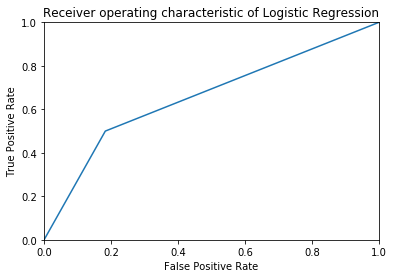

The AUC value for Decision Tree is: 0.6585365853658537


In [139]:
fpr, tpr, thresholds = roc_curve(ytest, pred_rf)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Logistic Regression')
plt.show()
roc_auc = auc(fpr, tpr)
print('The AUC value for Decision Tree is:',roc_auc)

### Random Forest(SMOTE)

In [140]:
xtrain_s, xtest_s, ytrain_s, ytest_s = train_test_split(x_imp, y, test_size=0.3, random_state=11)

In [141]:
from imblearn.over_sampling import SMOTE
ros = SMOTE(random_state = 5)
xtrain_s, ytrain_s = ros.fit_resample(xtrain_s, ytrain_s)

In [142]:
xtrain_s = pd.DataFrame(xtrain_s, columns=x_imp.columns)
ytrain_s = pd.DataFrame(ytrain_s, columns=['Biopsy'])
ytrain_s.Biopsy.value_counts()

1    557
0    557
Name: Biopsy, dtype: int64

In [143]:
rf = RandomForestClassifier(n_estimators=200, criterion = 'entropy',max_features='sqrt', max_depth=7, random_state=7)
rf.fit(xtrain_s,ytrain_s)
THRESHOLD = 0.5
pred_rf = np.where((rf.predict_proba(xtest_s)[:,1] >= THRESHOLD), 1, 0)

pd.DataFrame(data=[accuracy_score(ytest_s, pred_rf)*100, recall_score(ytest_s, pred_rf)*100,
                   precision_score(ytest_s, pred_rf)*100, roc_auc_score(ytest_s, pred_rf)*100], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,87.984496
recall,0.000000
precision,0.000000
roc_auc_score,46.138211


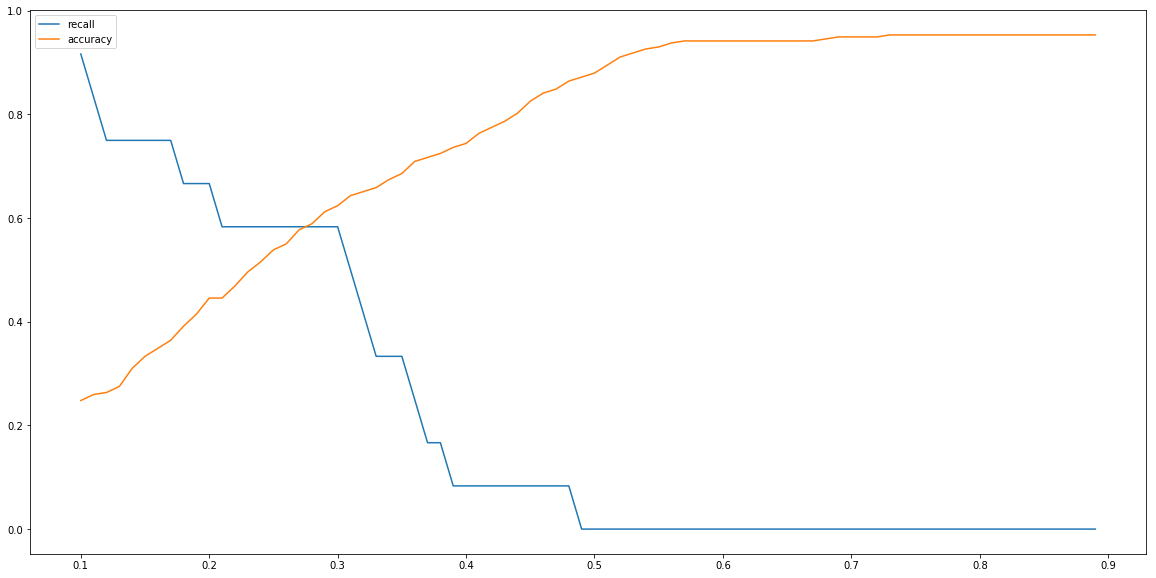

In [144]:
pred_prob=rf.predict_proba(xtest_s)[:,1]
ind=[]
recall=[]
accuracy=[]
li=np.arange(.1,.9,0.01)
for i in li:
    pred=np.where(pred_prob<i,0,1)
    recall.append(metrics.recall_score(ytest_s,pred))
    accuracy.append(metrics.accuracy_score(ytest_s,pred))
    ind.append(i)
plt.figure(figsize=(20,10))
plt.plot(li,recall,label='recall')
plt.plot(li,accuracy,label='accuracy')
plt.legend(loc='best')

In [145]:
rf = RandomForestClassifier(n_estimators=200, criterion = 'entropy',max_features='sqrt', max_depth=7, random_state=7)
rf.fit(xtrain_s,ytrain_s)
THRESHOLD = 0.26
pred_rf = np.where((rf.predict_proba(xtest_s)[:,1] >= THRESHOLD), 1, 0)

pd.DataFrame(data=[accuracy_score(ytest_s, pred_rf)*100, recall_score(ytest_s, pred_rf)*100,
                   precision_score(ytest_s, pred_rf)*100, roc_auc_score(ytest_s, pred_rf)*100], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,55.038760
recall,58.333333
precision,5.932203
roc_auc_score,56.605691


In [146]:
print(classification_report(ytest_s, pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.55      0.70       246
           1       0.06      0.58      0.11        12

   micro avg       0.55      0.55      0.55       258
   macro avg       0.51      0.57      0.40       258
weighted avg       0.92      0.55      0.67       258



In [147]:
confusion_matrix(ytest_s, pred_rf)

array([[135, 111],
       [  5,   7]], dtype=int64)

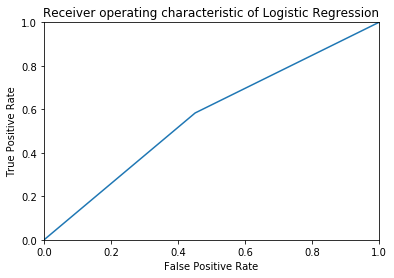

The AUC value for Decision Tree(SMOTE) is: 0.5660569105691058


In [148]:
fpr, tpr, thresholds = roc_curve(ytest_s, pred_rf)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Logistic Regression')
plt.show()
roc_auc = auc(fpr, tpr)
print('The AUC value for Decision Tree(SMOTE) is:',roc_auc)

### Random Forest(OverSampling)

* Random oversampling balances the data by randomly oversampling the minority class. Informative oversampling uses a pre-specified criterion and synthetically generates minority class observations.

* An advantage of using this method is that it leads to no information loss. The disadvantage of using this method is that, since oversampling simply adds replicated observations in original data set, it ends up adding multiple observations of several types, thus leading to overfitting. Although, the training accuracy of such data set will be high, but the accuracy on unseen data will be worse.

In [149]:
xtrain_o, xtest_o, ytrain_o, ytest_o = train_test_split(x_imp, y, test_size=0.3, random_state=11)

In [150]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0,ratio=0.625)
xtrain_o, ytrain_o = ros.fit_resample(xtrain_o, ytrain_o)

In [151]:
xtrain_o = pd.DataFrame(xtrain_o, columns=x_imp.columns)
ytrain_o = pd.DataFrame(ytrain_o, columns=['Biopsy'])
ytrain_o.Biopsy.value_counts()

0    557
1    348
Name: Biopsy, dtype: int64

In [152]:
rf = RandomForestClassifier(n_estimators=200, criterion = 'entropy',max_features='sqrt', max_depth=7, random_state=7)
rf.fit(xtrain_o,ytrain_o)
THRESHOLD = 0.5
pred_rf = np.where((rf.predict_proba(xtest_o)[:,1] >= THRESHOLD), 1, 0)

pd.DataFrame(data=[accuracy_score(ytest_o, pred_rf)*100, recall_score(ytest_o, pred_rf)*100,
                   precision_score(ytest_o, pred_rf)*100, roc_auc_score(ytest_o, pred_rf)*100], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,94.961240
recall,8.333333
precision,33.333333
roc_auc_score,53.760163


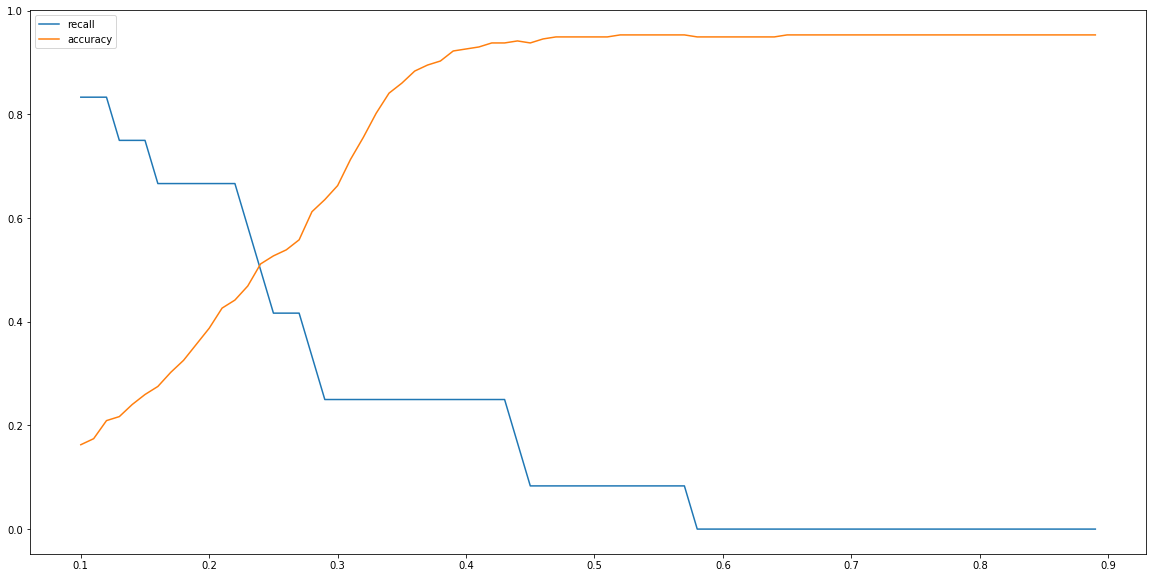

In [153]:
pred_prob=rf.predict_proba(xtest_o)[:,1]
ind=[]
recall=[]
accuracy=[]
li=np.arange(.1,.9,0.01)
for i in li:
    pred=np.where(pred_prob<i,0,1)
    recall.append(metrics.recall_score(ytest_s,pred))
    accuracy.append(metrics.accuracy_score(ytest_s,pred))
    ind.append(i)
plt.figure(figsize=(20,10))
plt.plot(li,recall,label='recall')
plt.plot(li,accuracy,label='accuracy')
plt.legend(loc='best')

In [154]:
rf = RandomForestClassifier(n_estimators=200, criterion = 'entropy',max_features='sqrt', max_depth=7, random_state=7)
rf.fit(xtrain_o,ytrain_o)
THRESHOLD = 0.25
pred_rf = np.where((rf.predict_proba(xtest_o)[:,1] >= THRESHOLD), 1, 0)

pd.DataFrame(data=[accuracy_score(ytest_o, pred_rf)*100, recall_score(ytest_o, pred_rf)*100,
                   precision_score(ytest_o, pred_rf)*100, roc_auc_score(ytest_o, pred_rf)*100], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,52.713178
recall,41.666667
precision,4.166667
roc_auc_score,47.459350


In [155]:
print(classification_report(ytest_o, pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.53      0.68       246
           1       0.04      0.42      0.08        12

   micro avg       0.53      0.53      0.53       258
   macro avg       0.50      0.47      0.38       258
weighted avg       0.91      0.53      0.65       258



In [156]:
confusion_matrix(ytest_o, pred_rf)

array([[131, 115],
       [  7,   5]], dtype=int64)

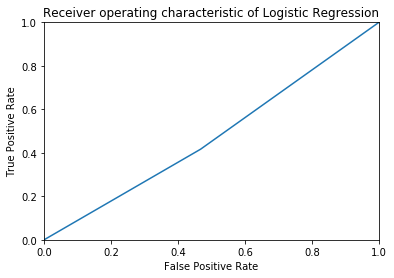

The AUC value for Decision Tree(OverSampling) is: 0.4745934959349593


In [157]:
fpr, tpr, thresholds = roc_curve(ytest_o, pred_rf)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Logistic Regression')
plt.show()
roc_auc = auc(fpr, tpr)
print('The AUC value for Decision Tree(OverSampling) is:',roc_auc)

### Random Forest(UnderSampling)

* Random forest models have the ability to use down-sampling without data loss. Recall that random forests is a tree ensemble method. A large number of bootstrap samples are taken form the training data and a separate unpruned tree is created for each data set. This model contains another feature that randomly samples a subset of predictors at each split to encourage diversity of the resulting trees.
* When predicting a new sample, a prediction is produced by every tree in the forest and these results are combined to generate a single prediction for an individual sample.

In [158]:
xtrain_u, xtest_u, ytrain_u, ytest_u = train_test_split(x_imp, y, test_size=0.3, random_state=11)

In [159]:
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=0,ratio=0.625)
xtrain_u, ytrain_u = ros.fit_resample(xtrain_u, ytrain_u)

In [160]:
xtrain_u = pd.DataFrame(xtrain_u, columns=x_imp.columns)
ytrain_u = pd.DataFrame(ytrain_u, columns=['Biopsy'])
ytrain_u.Biopsy.value_counts()

0    68
1    43
Name: Biopsy, dtype: int64

In [161]:
rf = RandomForestClassifier(n_estimators=200, criterion = 'entropy',max_features='sqrt', max_depth=7, random_state=7)
rf.fit(xtrain_u,ytrain_u)
THRESHOLD = 0.5
pred_rf = np.where((rf.predict_proba(xtest_u)[:,1] >= THRESHOLD), 1, 0)

pd.DataFrame(data=[accuracy_score(ytest_u, pred_rf)*100, recall_score(ytest_u, pred_rf)*100,
                   precision_score(ytest_u, pred_rf)*100, roc_auc_score(ytest_u, pred_rf)*100], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,78.294574
recall,41.666667
precision,9.259259
roc_auc_score,60.873984


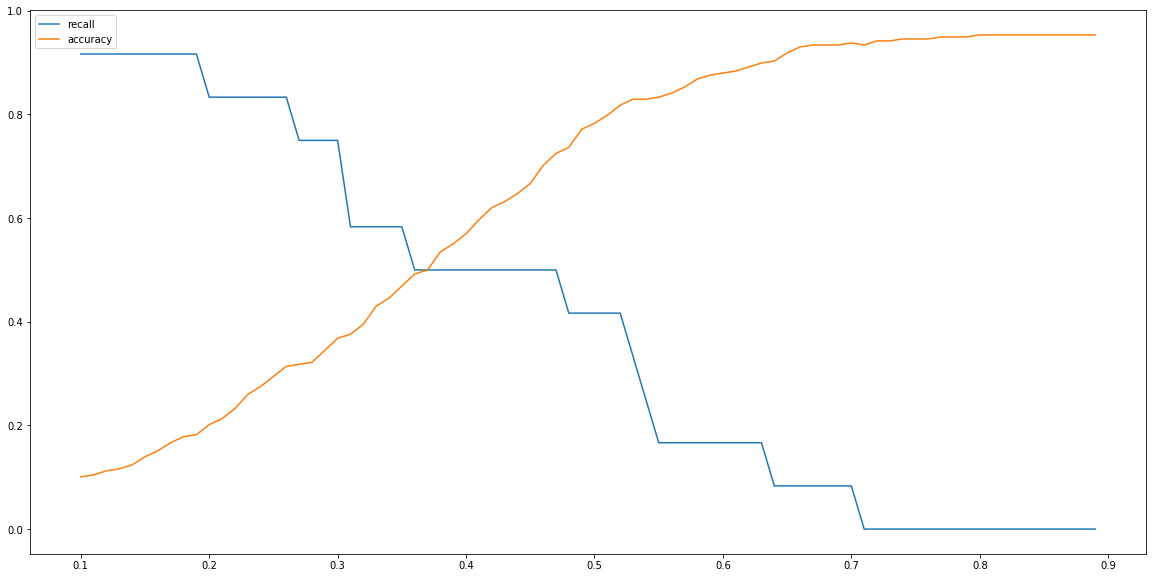

In [162]:
pred_prob=rf.predict_proba(xtest_u)[:,1]
ind=[]
recall=[]
accuracy=[]
li=np.arange(.1,.9,0.01)
for i in li:
    pred=np.where(pred_prob<i,0,1)
    recall.append(metrics.recall_score(ytest_u,pred))
    accuracy.append(metrics.accuracy_score(ytest_u,pred))
    ind.append(i)
plt.figure(figsize=(20,10))
plt.plot(li,recall,label='recall')
plt.plot(li,accuracy,label='accuracy')
plt.legend(loc='best')

In [163]:
rf = RandomForestClassifier(n_estimators=200, criterion = 'entropy',max_features='sqrt', max_depth=7, random_state=7)
rf.fit(xtrain_u,ytrain_u)
THRESHOLD = 0.4
pred_rf = np.where((rf.predict_proba(xtest_u)[:,1] >= THRESHOLD), 1, 0)

pd.DataFrame(data=[accuracy_score(ytest_u, pred_rf)*100, recall_score(ytest_u, pred_rf)*100,
                   precision_score(ytest_u, pred_rf)*100, roc_auc_score(ytest_u, pred_rf)*100], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,56.976744
recall,50.000000
precision,5.405405
roc_auc_score,53.658537


In [164]:
print(classification_report(ytest_u, pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.57      0.72       246
           1       0.05      0.50      0.10        12

   micro avg       0.57      0.57      0.57       258
   macro avg       0.51      0.54      0.41       258
weighted avg       0.92      0.57      0.69       258



In [165]:
confusion_matrix(ytest_u, pred_rf)

array([[141, 105],
       [  6,   6]], dtype=int64)

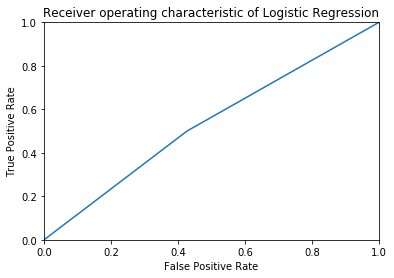

The AUC value for Decision Tree(UnderSampling) is: 0.5365853658536586


In [166]:
fpr, tpr, thresholds = roc_curve(ytest_u, pred_rf)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Logistic Regression')
plt.show()
roc_auc = auc(fpr, tpr)
print('The AUC value for Decision Tree(UnderSampling) is:',roc_auc)

In [167]:
xtrain_s = pd.DataFrame(xtrain_s, columns=df_scale.columns)
ytrain_s = pd.DataFrame(ytrain_s, columns=['Biopsy'])
ytrain_s.Biopsy.value_counts()

1    557
0    557
Name: Biopsy, dtype: int64

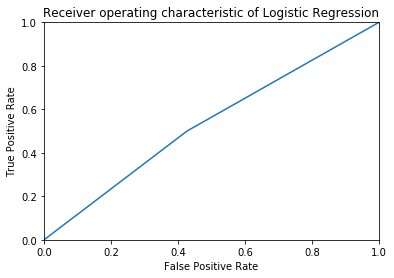

The AUC value for Decision Tree(SMOTE) is: 0.5365853658536586


In [168]:
fpr, tpr, thresholds = roc_curve(ytest_s, pred_rf)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Logistic Regression')
plt.show()
roc_auc = auc(fpr, tpr)
print('The AUC value for Decision Tree(SMOTE) is:',roc_auc)